In [1]:
from catalog import UnifiedExperimentManager
import logging
from logger_config import log_manager, get_module_logger
# 配置日志
log_manager.set_levels(
    file_level=logging.WARNING,
    console_level=logging.WARNING
)
logger = get_module_logger()
manager = UnifiedExperimentManager('catalog_config.yaml')
print(f"当前有 {len(manager.search())} 个实验")

当前有 80 个实验


In [11]:
# 多条件查询
specific_experiments = manager.search(
    chip_id="#20250829012",
    device_id="2",
    # created_after="2025-09-16",
    # test_unit_id="Test Unit A2"
)
print(f"符合条件的实验有 {len(specific_experiments)} 个")
# 获取第一个实验的详细信息
if specific_experiments:
    exp = specific_experiments[0]
    print(f"实验ID: {exp.test_id}")
    print(f"状态: {exp.status}")
    print(f"完成度: {exp.completion_percentage}%")
    print(f"有特征文件: {exp.has_features()}")

符合条件的实验有 1 个
实验ID: test_20250917201531_eaf885e2
状态: completed
完成度: 100.0%
有特征文件: True


In [12]:
manager.get_statistics()

{'overview': {'total_experiments': 80,
  'completed_experiments': 79,
  'completion_rate': 0.9875,
  'unique_chips': 18,
  'unique_batches': 6},
 'files': {'total_raw_files': 80,
  'total_feature_files': 80,
  'feature_coverage': 1.0,
  'missing_feature_files': 0},
 'storage': {'total_raw_size': 73349096696,
  'total_feature_size': 55111816,
  'total_storage_size': 73404208512},
 'data': {'total_data_points': 31072831785},
 'sync': {'last_sync_time': datetime.datetime(2025, 9, 30, 13, 19, 51, 945691),
  'pending_syncs': 0,
  'sync_conflicts': 0}}

In [13]:
if exp and exp.has_features(version='v1'):
    # 获取特征 DataFrame，列名就是特征名
    df = exp.get_feature_dataframe(version='v1', data_type='transfer')
    feature_names = df.columns.tolist()
    print(feature_names)

['absgm_max_forward', 'absgm_max_reverse', 'Von_forward', 'Von_reverse', 'absI_max_raw', 'absgm_max_forward_Vg', 'absgm_max_forward_Id', 'absgm_max_reverse_Vg', 'absgm_max_reverse_Id', 'Von_forward_Vg', 'Von_forward_Id', 'Von_reverse_Vg', 'Von_reverse_Id', 'absI_max_raw_Vg', 'absI_max_raw_Id']


In [14]:
manager.create_combined_features_dataframe([exp],feature_names=feature_names,include_workflow=True)

experiment_id       chip_id device_id                       test_id  \
0                69  #20250829012         2  test_20250917201531_eaf885e2   
1                69  #20250829012         2  test_20250917201531_eaf885e2   
2                69  #20250829012         2  test_20250917201531_eaf885e2   
3                69  #20250829012         2  test_20250917201531_eaf885e2   
4                69  #20250829012         2  test_20250917201531_eaf885e2   
...             ...           ...       ...                           ...   
5884             69  #20250829012         2  test_20250917201531_eaf885e2   
5885             69  #20250829012         2  test_20250917201531_eaf885e2   
5886             69  #20250829012         2  test_20250917201531_eaf885e2   
5887             69  #20250829012         2  test_20250917201531_eaf885e2   
5888             69  #20250829012         2  test_20250917201531_eaf885e2   

      step_index  absgm_max_forward  absgm_max_reverse  Von_forward  \
0              0           0.023558           0.011121        -0.23   
1              1           0.005065           0.005018        -0.20   
2              2           0.005043           0.004986        -0.26   
3              3           0.004985           0.004979        -0.18   
4              4           0.005023           0.004870        -0.20   
...          ...                ...                ...          ...   
5884        5884           0.000144           0.000065         0.50   
5885        5885           0.000071           0.000099         0.07   
5886        5886           0.000085           0.000063        -0.30   
5887        5887           0.000087           0.000081        -0.30   
5888        5888           0.000061           0.000071         0.06   

      Von_reverse  absI_max_raw  ...  workflow_step_2_type  \
0           -0.16      0.001525  ...              transfer   
1           -0.28      0.001368  ...              transfer   
2           -0.21      0.001360  ...              transfer   
3           -0.21      0.001351  ...              transfer   
4           -0.12      0.001340  ...              transfer   
...           ...           ...  ...                   ...   
5884        -0.05      0.000001  ...              transfer   
5885        -0.11      0.000002  ...              transfer   
5886        -0.03      0.000001  ...              transfer   
5887         0.09      0.000002  ...              transfer   
5888         0.20      0.000002  ...              transfer   

                        workflow_step_2_id  workflow_step_2_command_id  \
0     faf5e788-311a-45b0-a86a-5b07a3f4ca7a                           1   
1     faf5e788-311a-45b0-a86a-5b07a3f4ca7a                           1   
2     faf5e788-311a-45b0-a86a-5b07a3f4ca7a                           1   
3     faf5e788-311a-45b0-a86a-5b07a3f4ca7a                           1   
4     faf5e788-311a-45b0-a86a-5b07a3f4ca7a                           1   
...                                    ...                         ...   
5884  faf5e788-311a-45b0-a86a-5b07a3f4ca7a                           1   
5885  faf5e788-311a-45b0-a86a-5b07a3f4ca7a                           1   
5886  faf5e788-311a-45b0-a86a-5b07a3f4ca7a                           1   
5887  faf5e788-311a-45b0-a86a-5b07a3f4ca7a                           1   
5888  faf5e788-311a-45b0-a86a-5b07a3f4ca7a                           1   

      workflow_step_2_param_isSweep  workflow_step_2_param_timeStep  \
0                                 1                             300   
1                                 1                             300   
2                                 1                             300   
3                                 1                             300   
4                                 1                             300   
...                             ...                             ...   
5884                              1                             300   
5885                      

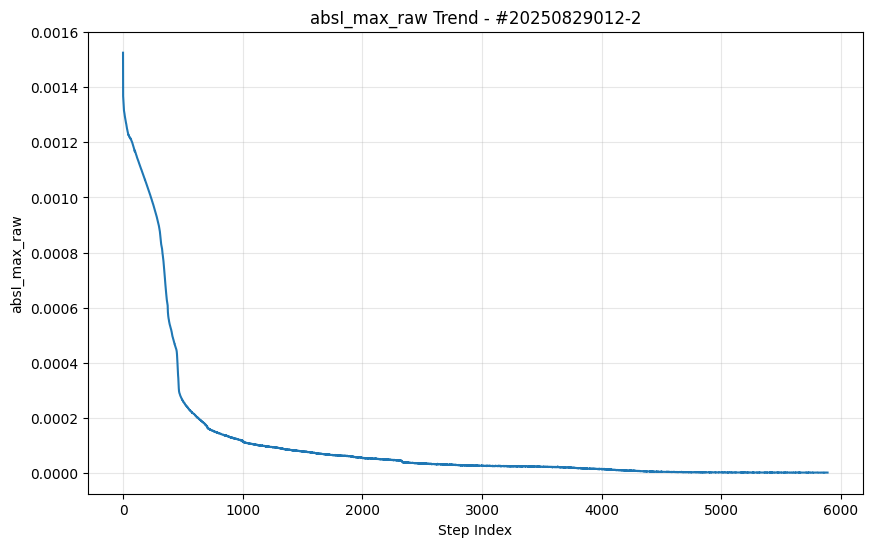

In [15]:
fig = exp.plot_feature_trend('absI_max_raw','transfer')

In [16]:
all_experiments = manager.search()

In [18]:
all_exp_feat_df = manager.create_combined_features_dataframe(all_experiments,feature_names=feature_names,include_workflow=True)

In [19]:
all_exp_feat_df.to_csv('all_exp_feat_df.csv',index=False)

In [ ]:
temp = exp.get_data_summary()
from pprint import pprint
pprint(temp)

{'file_path': '/home/lidonghaowsl/develop_win/hdd/data/Stability_PS20250929/raw/#20250829012-2-StabilityVg0p6-test_20250917201531_eaf885e2.h5',
 'format_version': '2.0_direct_new_storage',
 'has_transfer_data': True,
 'has_transient_data': True,
 'transfer_data': {'data_types': ['Vg', 'Id'],
                   'measurement_data_shape': (5889, 2, 162),
                   'step_count': 5889,
                   'step_info_columns': ['step_index',
                                         'type',
                                         'start_time',
                                         'end_time',
                                         'reason',
                                         'data_file',
                                         'workflow_step_index',
                                         'workflow_total_steps',
                                         'workflow_path_readable',
                                         'workflow_iteration_info_type',
                     

In [ ]:
temp = exp.get_info()
from pprint import pprint
pprint(temp)

{'basic_info': {'batch_id': 'batch_20250917201529_acf11045',
                'chip_id': '#20250829012',
                'description': 'StabilityVg0p6',
                'device_id': '2',
                'id': 69,
                'test_id': 'test_20250917201531_eaf885e2'},
 'data_info': {'has_transfer_data': True,
               'has_transient_data': True,
               'total_data_points': 443508036,
               'transfer_steps': 5889,
               'transient_steps': 5888},
 'file_info': {'feature_file_size': 589231,
               'has_features': True,
               'raw_file_size': 1086339201},
 'status_info': {'completed_at': '2025-09-23T00:53:19.825267',
                 'completion_percentage': 100.0,
                 'created_at': '2025-09-17T20:15:31.888019',
                 'duration': None,
                 'is_completed': True,
                 'status': 'completed'}}


In [ ]:
# temp = 
exp.get_transfer_step_info_table()
# from pprint import pprint
# pprint(temp)

step_index         type                     start_time  \
0              0  b'transfer'  b'2025-09-17T20:15:32.634160'   
1              1  b'transfer'  b'2025-09-17T20:16:47.245141'   
2              2  b'transfer'  b'2025-09-17T20:18:01.811929'   
3              3  b'transfer'  b'2025-09-17T20:19:16.448471'   
4              4  b'transfer'  b'2025-09-17T20:20:31.080742'   
...          ...          ...                            ...   
5884        5884  b'transfer'  b'2025-09-23T00:47:17.891883'   
5885        5885  b'transfer'  b'2025-09-23T00:48:35.914282'   
5886        5886  b'transfer'  b'2025-09-23T00:49:53.969093'   
5887        5887  b'transfer'  b'2025-09-23T00:51:11.894673'   
5888        5888  b'transfer'  b'2025-09-23T00:52:29.931688'   

                           end_time       reason              data_file  \
0     b'2025-09-17T20:16:21.517816'  b'transfer'      b'1_transfer.csv'   
1     b'2025-09-17T20:17:36.118528'  b'transfer'      b'3_transfer.csv'   
2     b'2025-09-17T20:18:50.746434'  b'transfer'      b'5_transfer.csv'   
3     b'2025-09-17T20:20:05.346405'  b'transfer'      b'7_transfer.csv'   
4     b'2025-09-17T20:21:19.933674'  b'transfer'      b'9_transfer.csv'   
...                             ...          ...                    ...   
5884  b'2025-09-23T00:48:06.739186'  b'transfer'  b'11769_transfer.csv'   
5885  b'2025-09-23T00:49:24.732295'  b'transfer'  b'11771_transfer.csv'   
5886  b'2025-09-23T00:50:42.779433'  b'transfer'  b'11773_transfer.csv'   
5887  b'2025-09-23T00:52:00.673430'  b'transfer'  b'11775_transfer.csv'   
5888  b'2025-09-23T00:53:18.806270'  b'transfer'  b'11777_transfer.csv'   

      workflow_step_index  workflow_total_steps  \
0                       1                     2   
1                       1                     2   
2                       1                     2   
3                       1                     2   
4                       1                     2   
...                   ...                   ...   
5884                    1                     2   
5885                    1                     2   
5886                    1                     2   
5887                    1                     2   
5888                    2                     2   

                                 workflow_path_readable  \
0     b'\xe5\xbe\xaa\xe7\x8e\xaf[1/2] > \xe8\xbf\xad...   
1     b'\xe5\xbe\xaa\xe7\x8e\xaf[1/2] > \xe8\xbf\xad...   
2     b'\xe5\xbe\xaa\xe7\x8e\xaf[1/2] > \xe8\xbf\xad...   
3     b'\xe5\xbe\xaa\xe7\x8e\xaf[1/2] > \xe8\xbf\xad...   
4     b'\xe5\xbe\xaa\xe7\x8e\xaf[1/2] > \xe8\xbf\xad...   
...                                                 ...   
5884  b'\xe5\xbe\xaa\xe7\x8e\xaf[1/2] > \xe8\xbf\xad...   
5885  b'\xe5\xbe\xaa\xe7\x8e\xaf[1/2] > \xe8\xbf\xad...   
5886  b'\xe5\xbe\xaa\xe7\x8e\xaf[1/2] > \xe8\xbf\xad...   
5887  b'\xe5\xbe\xaa\xe7\x8e\xaf[1/2] > \xe8\xbf\xad...   
5888  b'\xe8\xbd\xac\xe7\xa7\xbb\xe7\x89\xb9\xe6\x80...   

     workflow_iteration_info_type  workflow_iteration_info_total  \
0                         b'loop'                         5000.0   
1                         b'loop'                         5000.0   
2                         b'loop'                         5000.0   
3                         b'loop'                         5000.0   
4                         b'loop'                         5000.0   
...                           ...                            ...   
5884                      b'loop'                         5000.0   
5885                      b'loop'                         5000.0   
5886                      b'loop'                         5000.0   
5887                      b'loop'                         5000.0   
5888                          b''                            NaN   

      workflow_iteration_info_current  
0                              5000.0  
1                              5000.0  
2                              5000.0  
3                              5000.0

In [20]:
exp.get_workflow_metadata()


{'workflow_step_1_type': 'loop',
 'workflow_step_1_id': '74fa4619-5c2f-414f-942b-cb08a90754bd',
 'workflow_step_1_iterations': 5000,
 'workflow_step_1_1_type': 'transfer',
 'workflow_step_1_1_id': '04d6fb06-0d85-4ab4-a3ca-175309407ae9',
 'workflow_step_1_1_command_id': 1,
 'workflow_step_1_1_param_isSweep': 1,
 'workflow_step_1_1_param_timeStep': 300,
 'workflow_step_1_1_param_sourceVoltage': 0,
 'workflow_step_1_1_param_drainVoltage': 100,
 'workflow_step_1_1_param_gateVoltageStart': -300,
 'workflow_step_1_1_param_gateVoltageEnd': 500,
 'workflow_step_1_1_param_gateVoltageStep': 10,
 'workflow_step_1_2_type': 'transient',
 'workflow_step_1_2_id': 'd14dbdfa-926b-451a-a01d-551dc02a64d3',
 'workflow_step_1_2_command_id': 1,
 'workflow_step_1_2_param_timeStep': 1,
 'workflow_step_1_2_param_sourceVoltage': 0,
 'workflow_step_1_2_param_drainVoltage': 100,
 'workflow_step_1_2_param_bottomTime': 125,
 'workflow_step_1_2_param_topTime': 125,
 'workflow_step_1_2_param_gateVoltageBottom': -300,

In [22]:
# 1. 首次使用：初始化 workflow metadata（一次性操作）
result = manager.initialize_workflow_metadata(force_update=False)

"""
Args
force_update
是否强制更新所有实验（包括已有 workflow metadata 的）

Returns
D
ct[str, Any]: 执行结果统计

total: 总实验数
updated: 成功更新的实验数
skipped: 跳过的实验数
failed: 失败的实验数
errors: 错误列表
"""
# 分别print
print(f"总实验数: {result['total']}")
print(f"成功更新的实验数: {result['updated']}")
print(f"跳过的实验数: {result['skipped']}")
print(f"失败的实验数: {result['failed']}")
if result['errors']:
    print("错误列表:")
    for error in result['errors']:
        print(f"实验ID: {error['test_id']}, 错误信息: {error['error']}")

总实验数: 0
成功更新的实验数: 0
跳过的实验数: 0
失败的实验数: 0


# 数据概况

In [23]:

exps = manager.search(workflow_step_1_1_param_gateVoltageEnd=500)
print(f"符合条件的实验有 {len(exps)} 个")
exps = manager.search(workflow_step_1_1_param_gateVoltageEnd=500,workflow_step_1_2_param_gateVoltageTop=400)
print(f"符合条件的实验有 {len(exps)} 个")
exps = manager.search(workflow_step_1_1_param_gateVoltageEnd=500,workflow_step_1_2_param_gateVoltageTop=500)
print(f"符合条件的实验有 {len(exps)} 个")
exps = manager.search(workflow_step_1_1_param_gateVoltageEnd=500,workflow_step_1_2_param_gateVoltageTop=600)
print(f"符合条件的实验有 {len(exps)} 个")


符合条件的实验有 48 个
符合条件的实验有 16 个
符合条件的实验有 18 个
符合条件的实验有 14 个


In [24]:
exps = manager.search(workflow_step_1_1_param_gateVoltageEnd=600)
print(f"符合条件的实验有 {len(exps)} 个")
exps = manager.search(workflow_step_1_1_param_gateVoltageEnd=600,workflow_step_1_2_param_gateVoltageTop=400)
print(f"符合条件的实验有 {len(exps)} 个")
exps = manager.search(workflow_step_1_1_param_gateVoltageEnd=600,workflow_step_1_2_param_gateVoltageTop=500)
print(f"符合条件的实验有 {len(exps)} 个")
exps = manager.search(workflow_step_1_1_param_gateVoltageEnd=600,workflow_step_1_2_param_gateVoltageTop=600)
print(f"符合条件的实验有 {len(exps)} 个")

符合条件的实验有 32 个
符合条件的实验有 0 个
符合条件的实验有 0 个
符合条件的实验有 32 个


In [25]:
exps[0].get_features(['absI_max_raw'],data_type='transfer')

{'absI_max_raw': array([1.70092e-03, 1.67426e-03, 1.65724e-03, ..., 4.09198e-06,
        3.36200e-06, 3.58416e-06], dtype=float32)}

In [2]:
exps = manager.search()

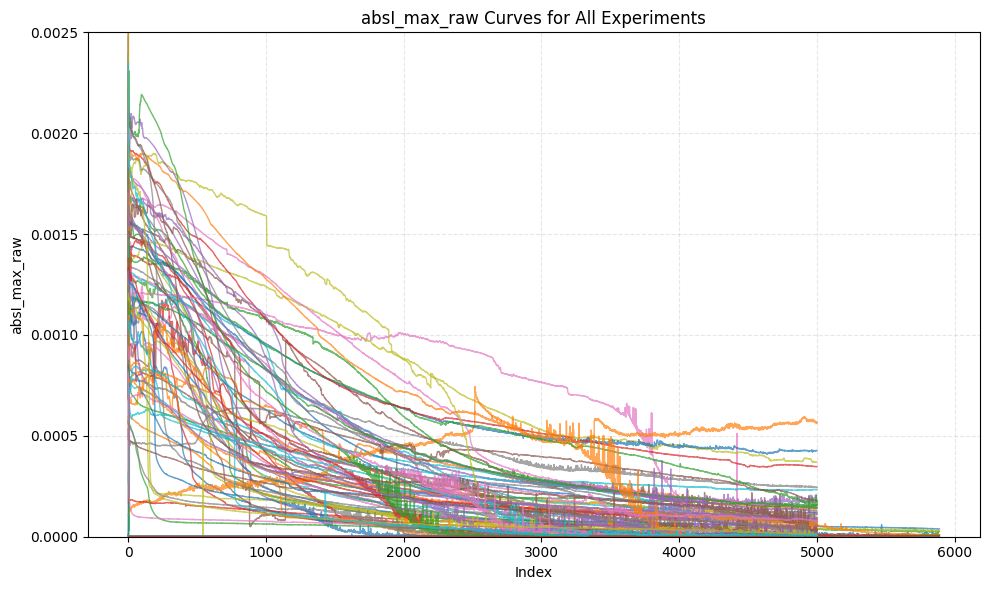

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# 遍历所有 exps，提取 absI_max_raw 特征，并存入 DataFrame
dfs = []
for i, exp in enumerate(exps):
    feat = exp.get_features(['absI_max_raw'], data_type='transfer')
    series = pd.Series(feat['absI_max_raw'], name=f'exp_{i}')
    dfs.append(series)

# 合并为一个 DataFrame（按列拼接，不同实验自动对齐索引）
df = pd.concat(dfs, axis=1)

# 绘制所有曲线在一张图上，线条设置为非常细
plt.figure(figsize=(10, 6))
for col in df.columns:
    plt.plot(df.index, df[col], linewidth=1, alpha=0.7)  # 线条细且稍微透明防止遮挡

plt.xlabel("Index")
plt.ylabel("absI_max_raw")
plt.ylim(0,0.0025)
plt.title("absI_max_raw Curves for All Experiments")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


# 排查异常曲线

In [14]:
exp = manager.search(exp_id=1)
print(len(exp))

80


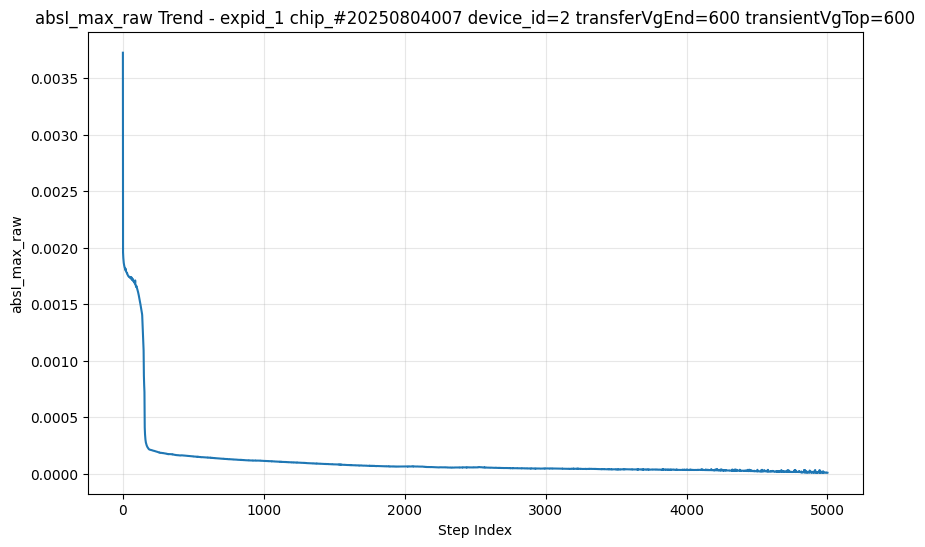

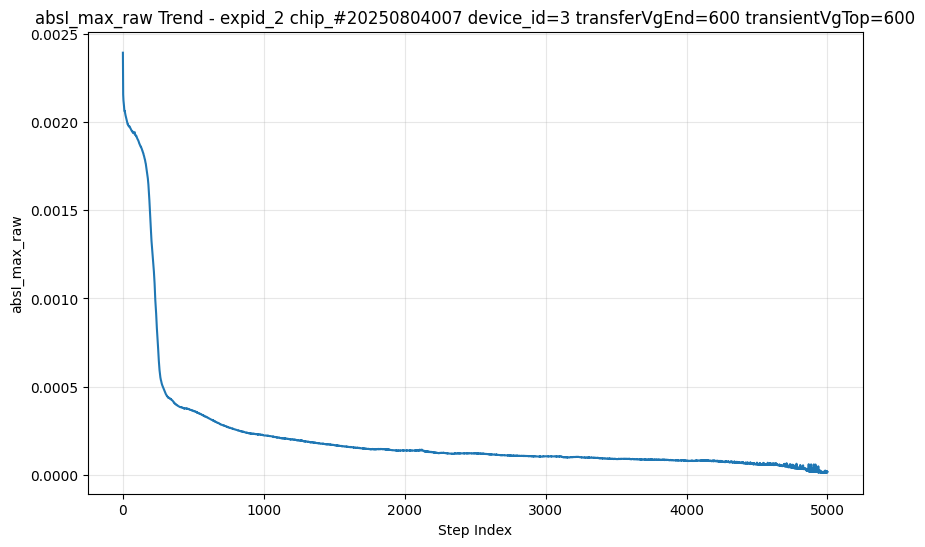

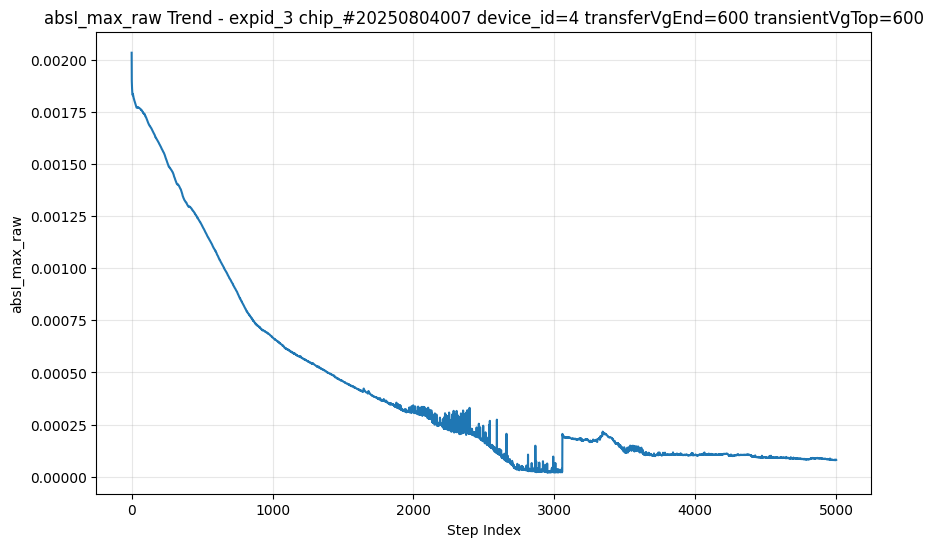

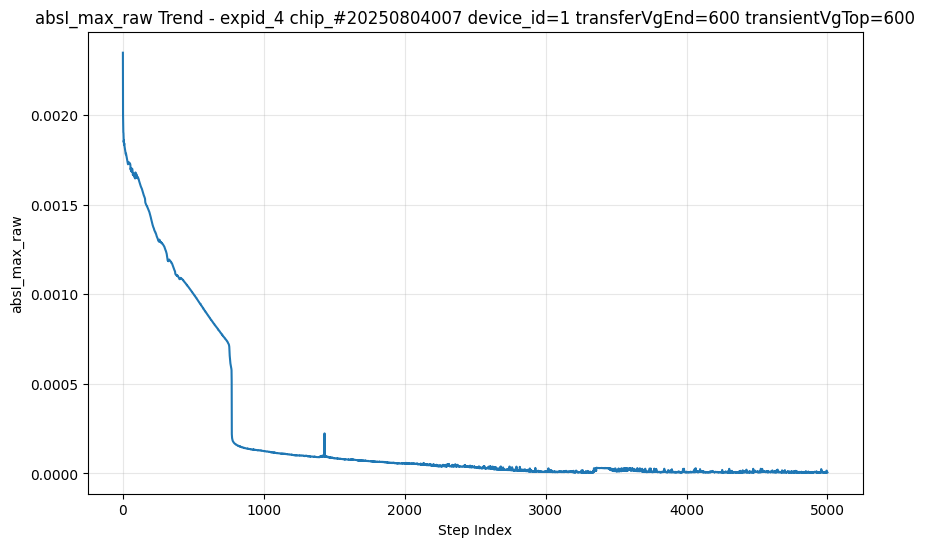

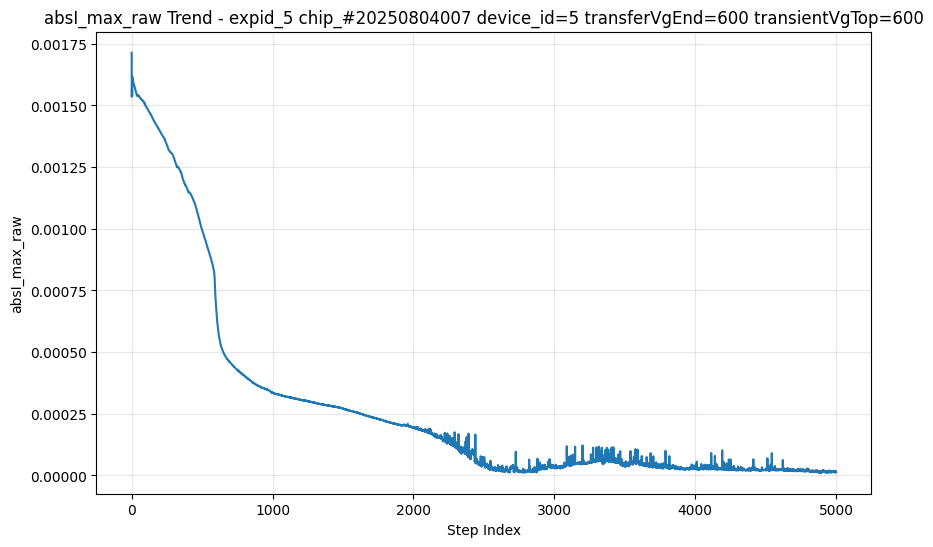

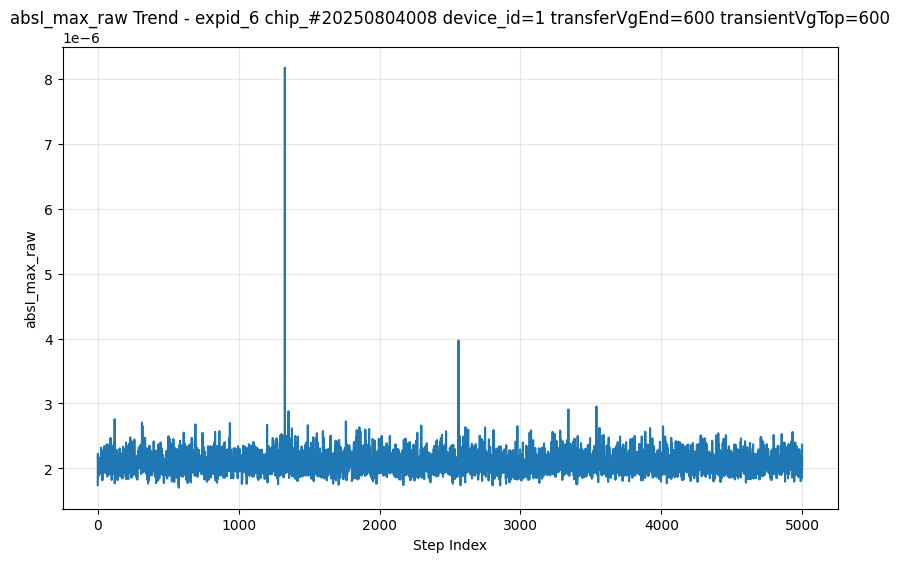

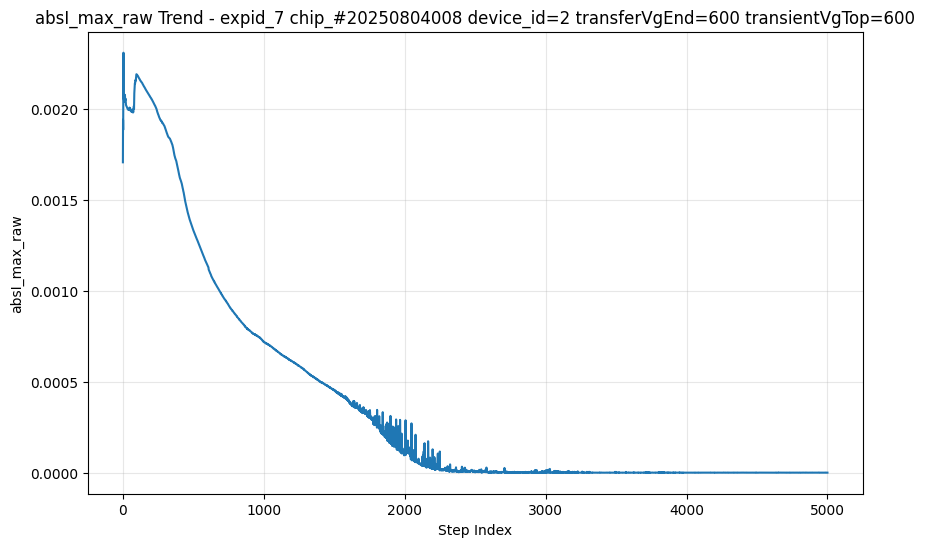

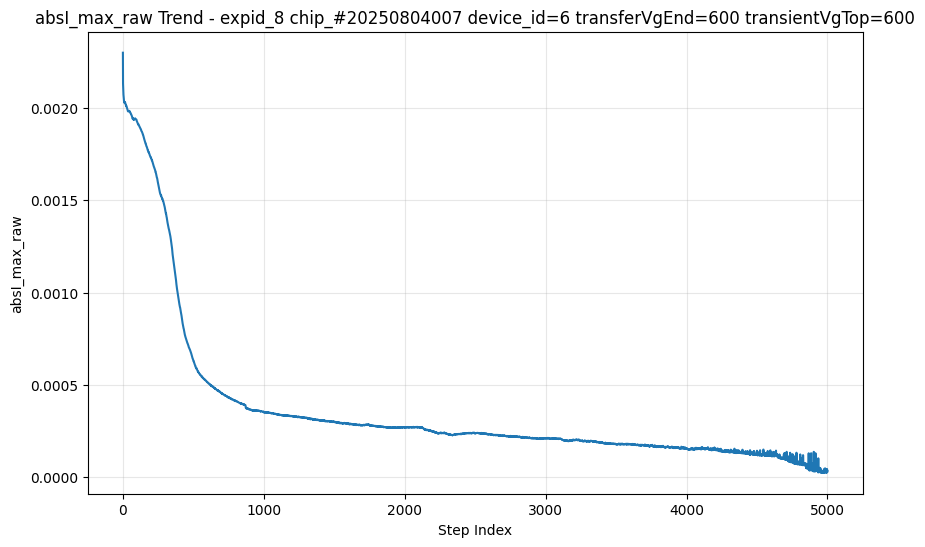

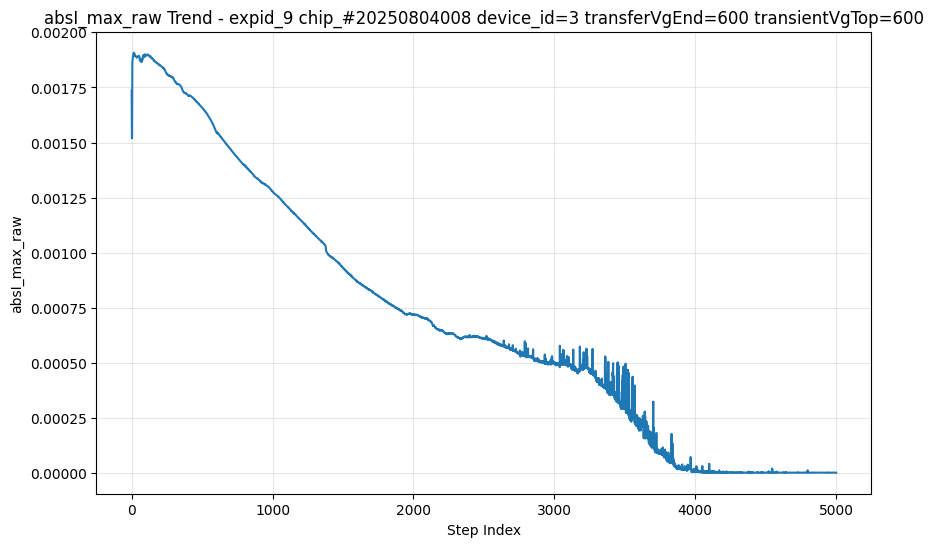

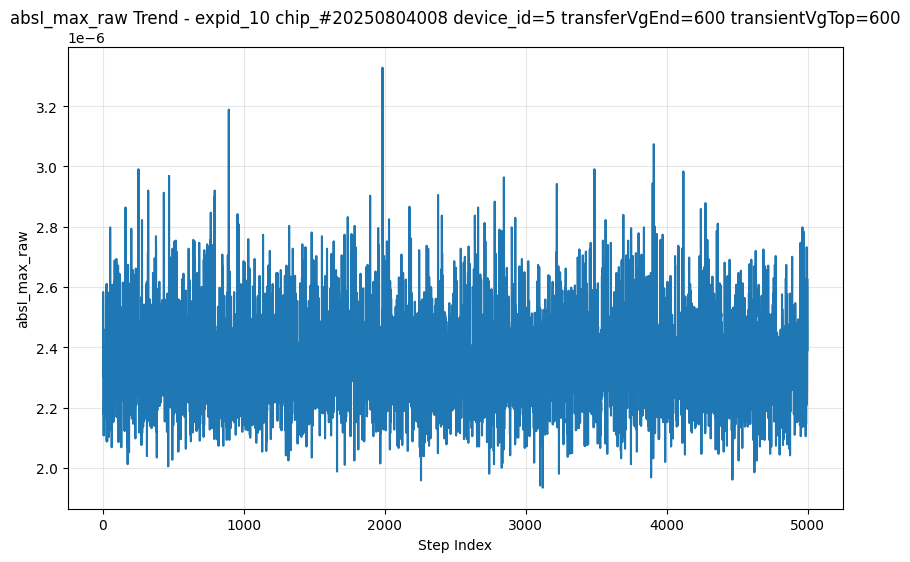

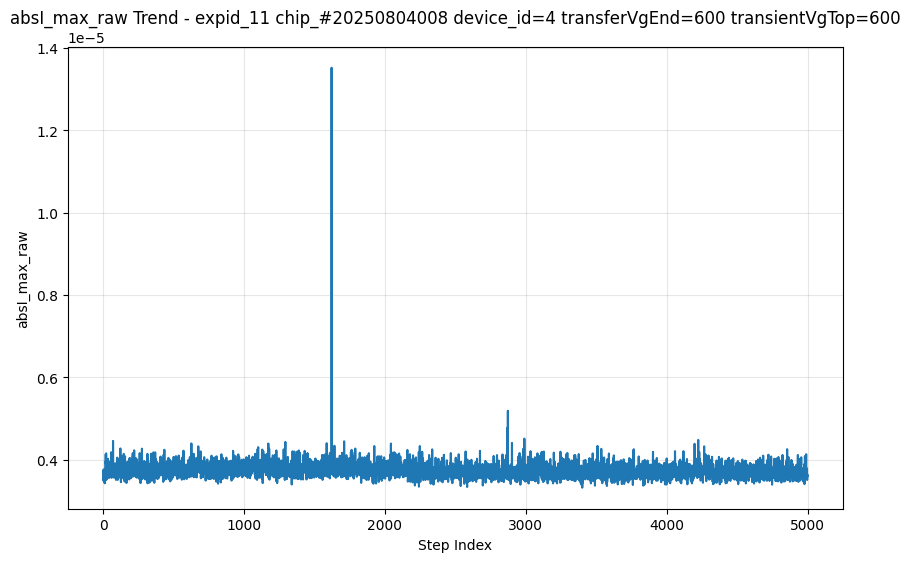

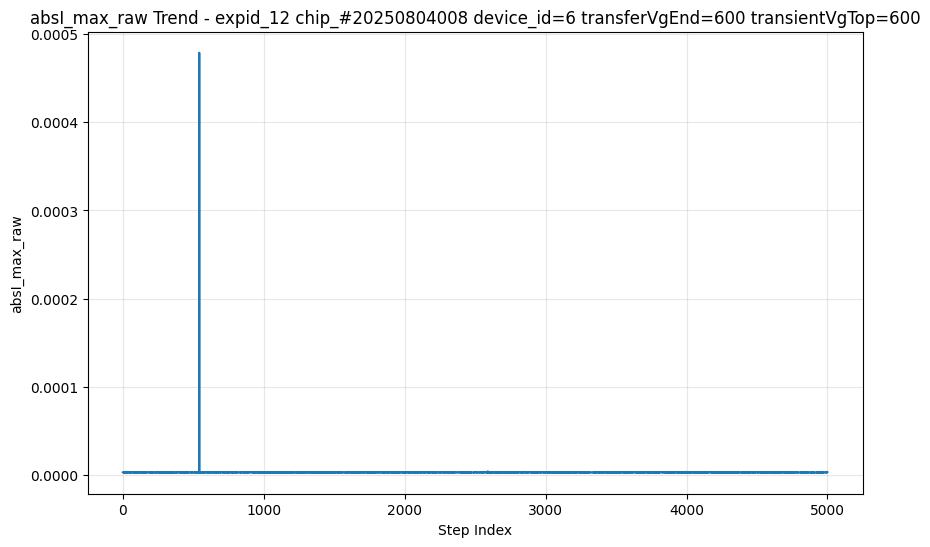

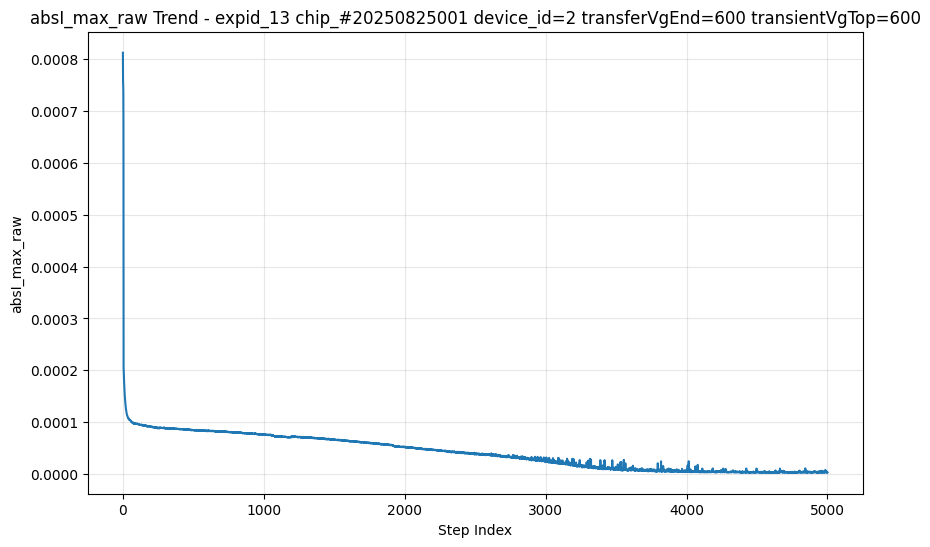

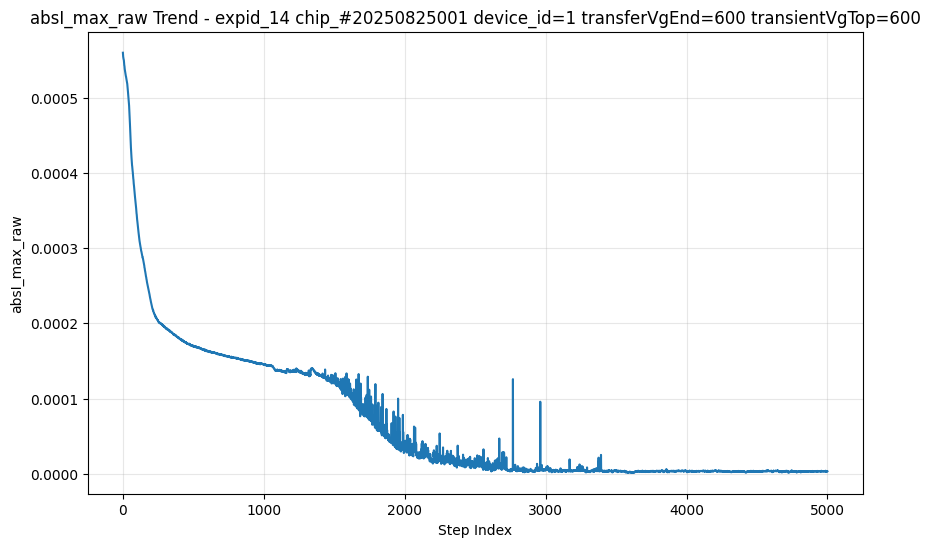

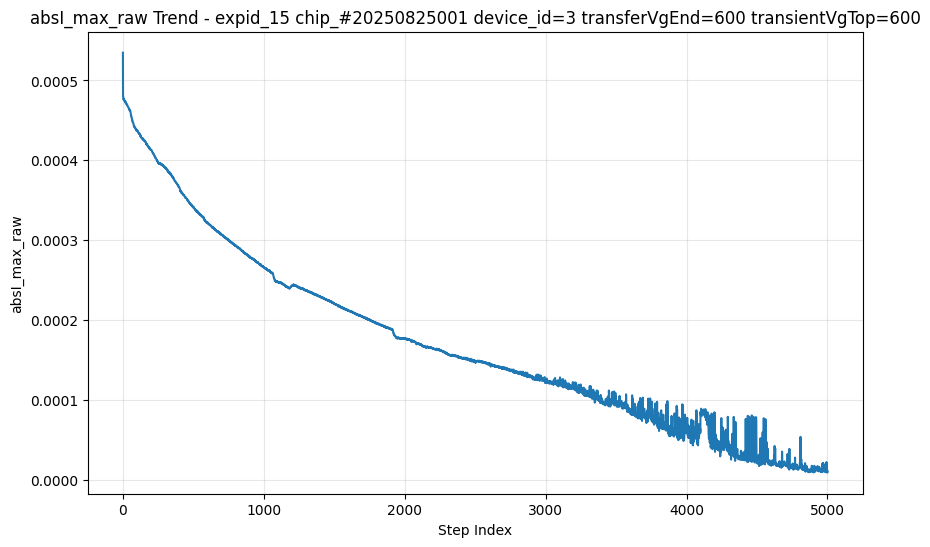

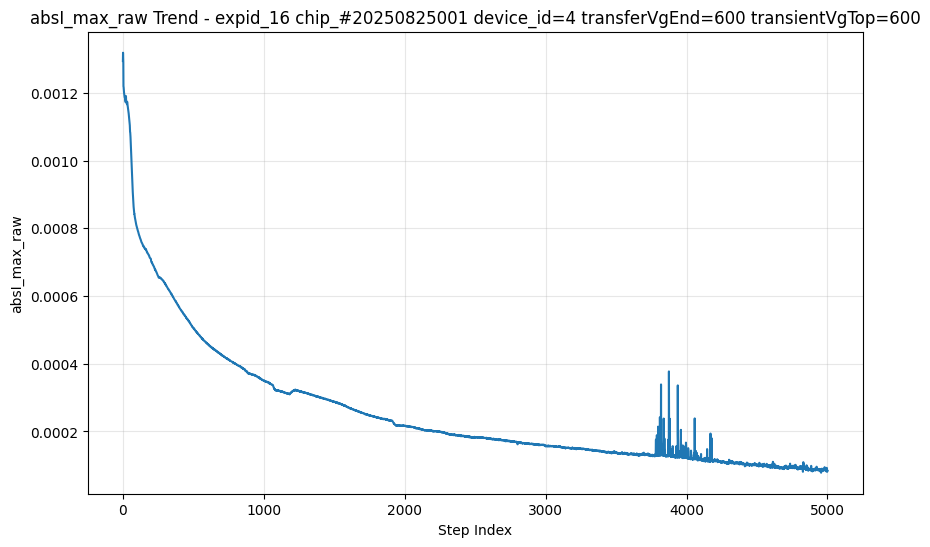

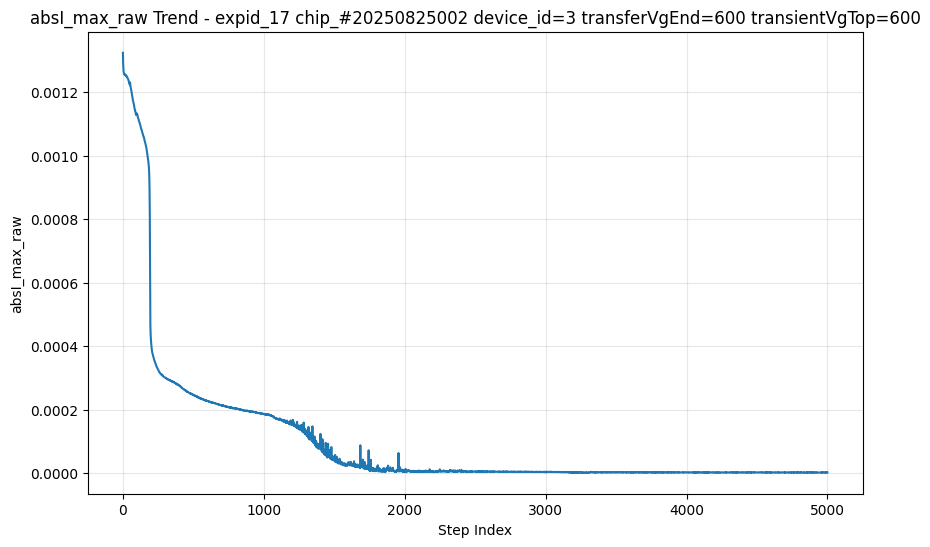

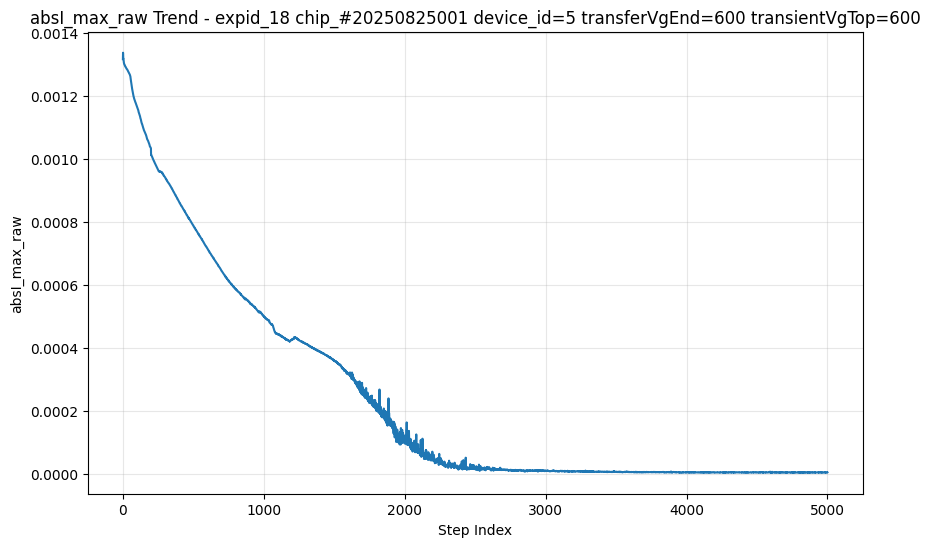

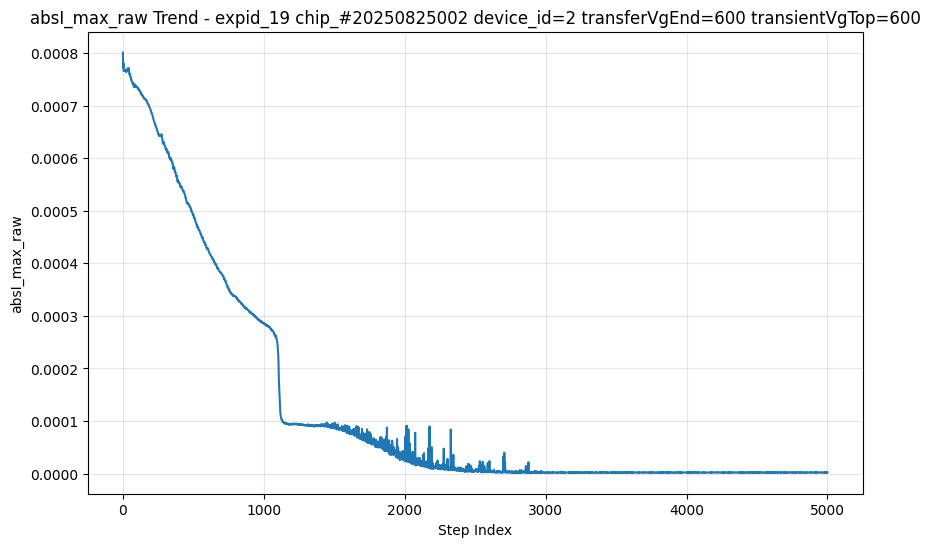

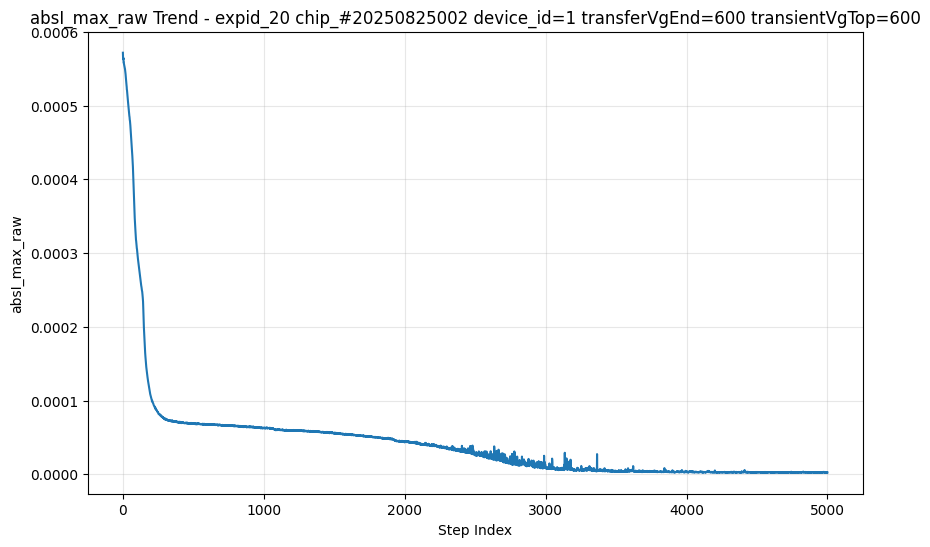

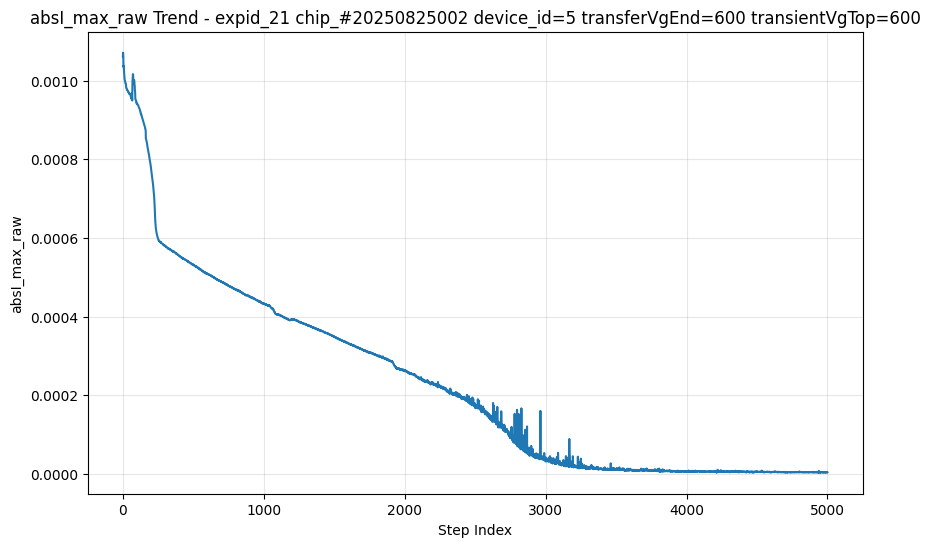

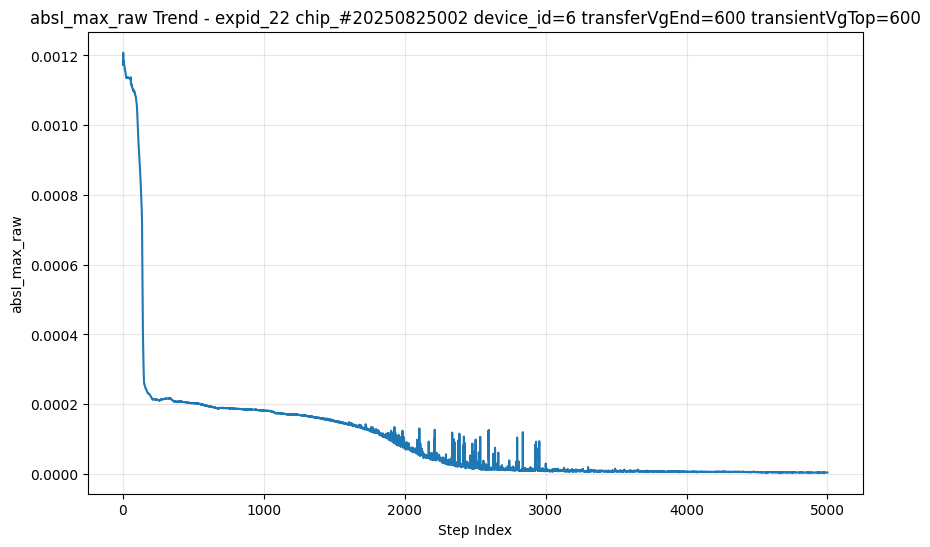

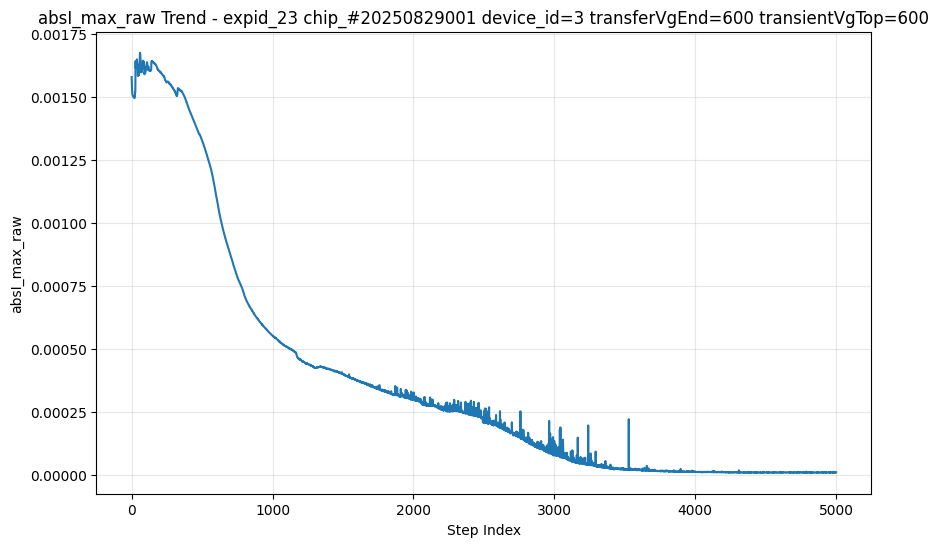

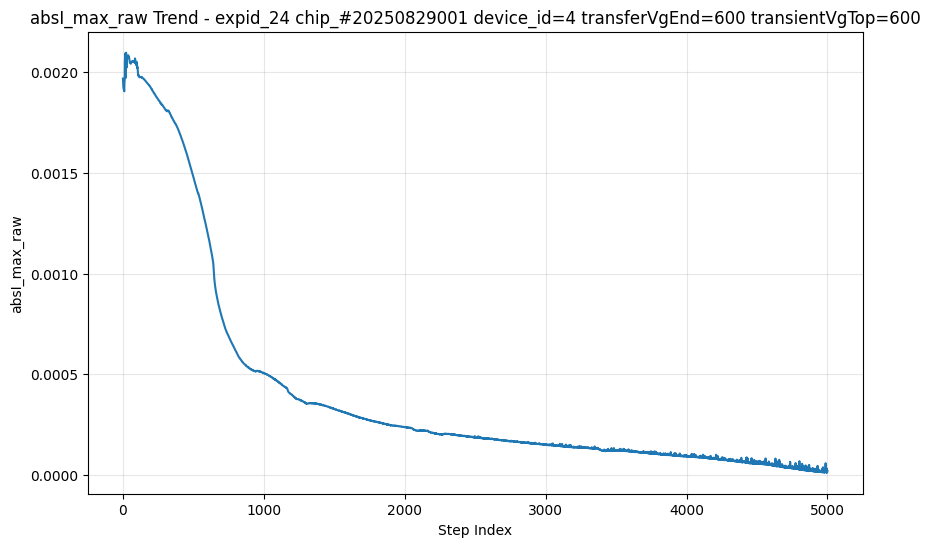

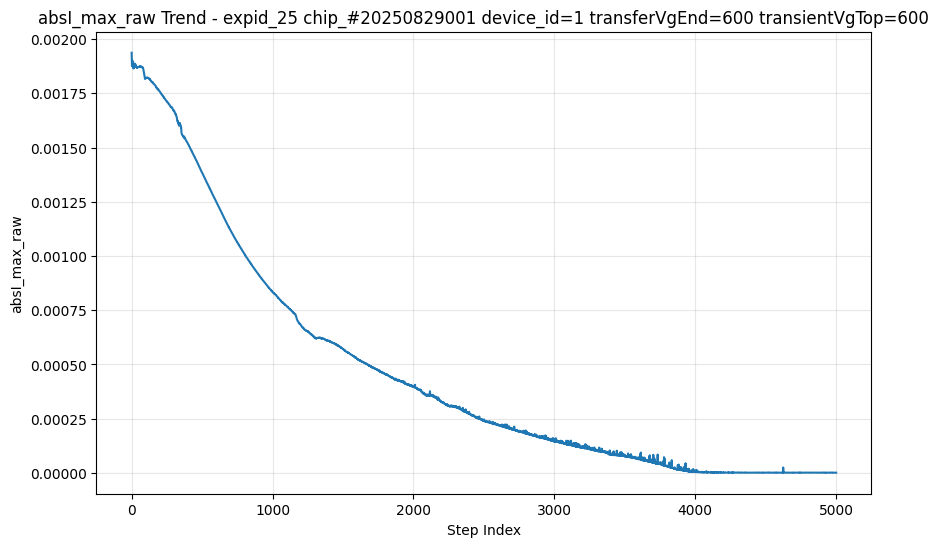

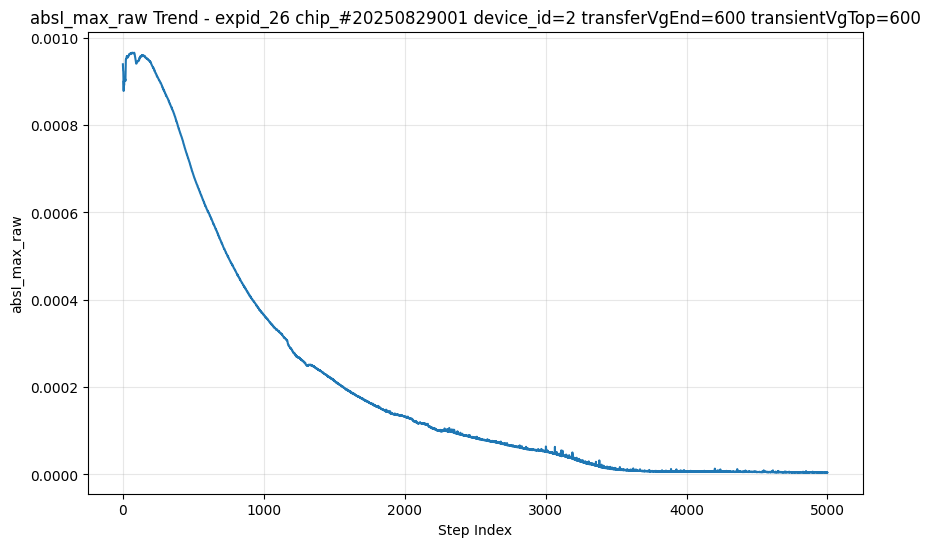

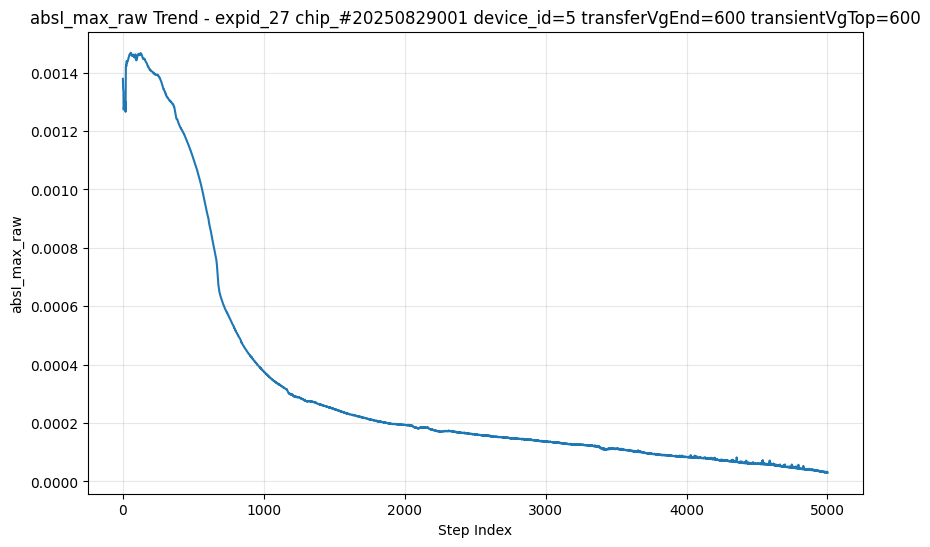

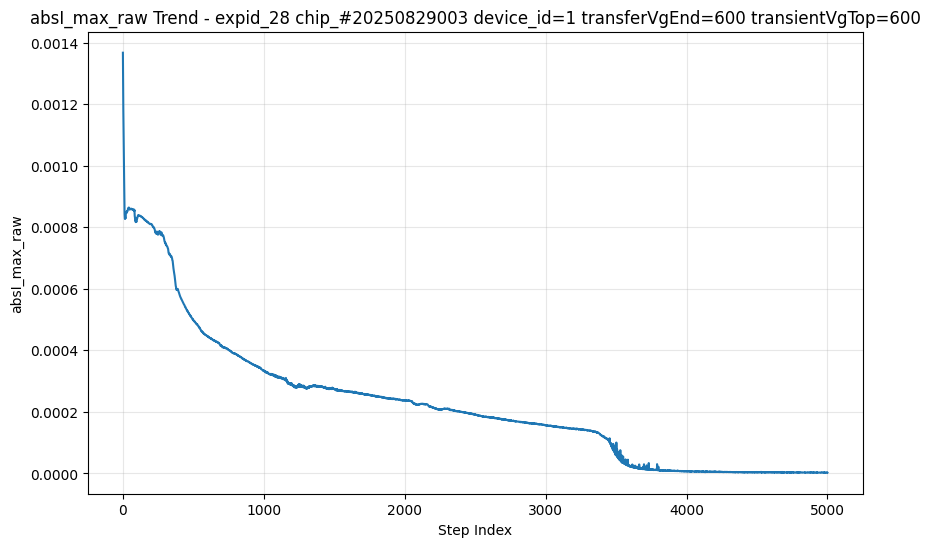

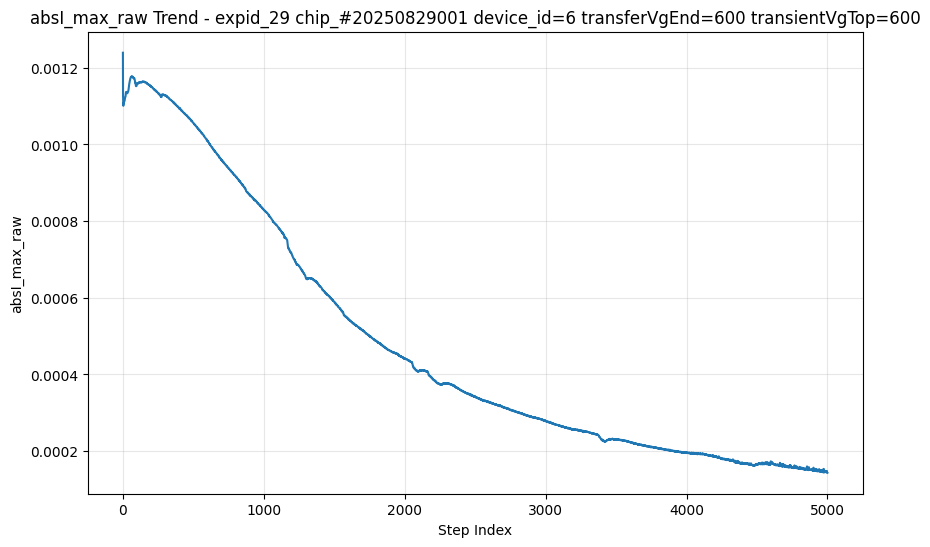

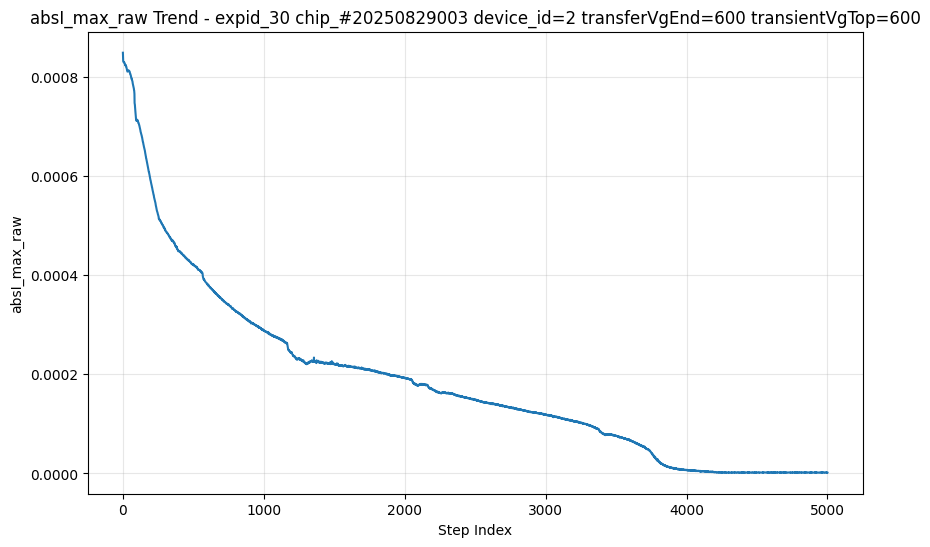

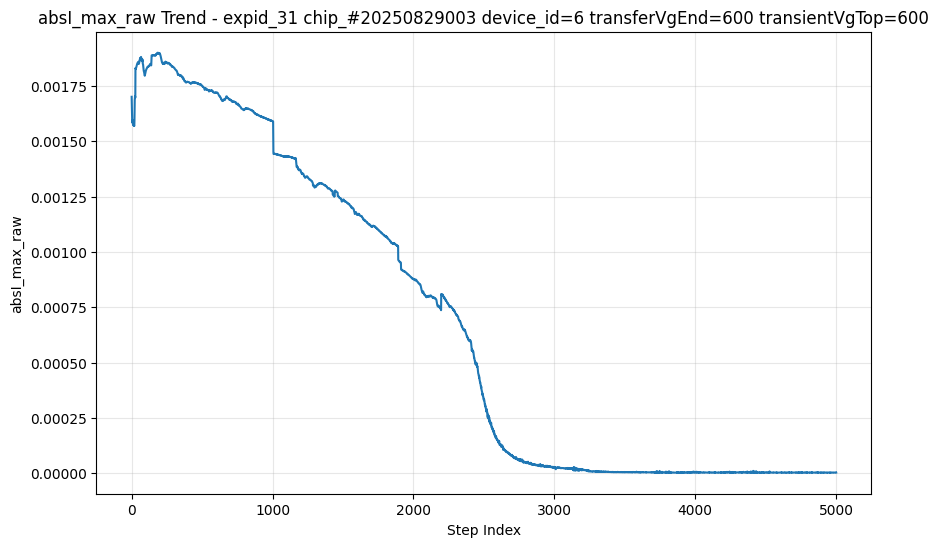

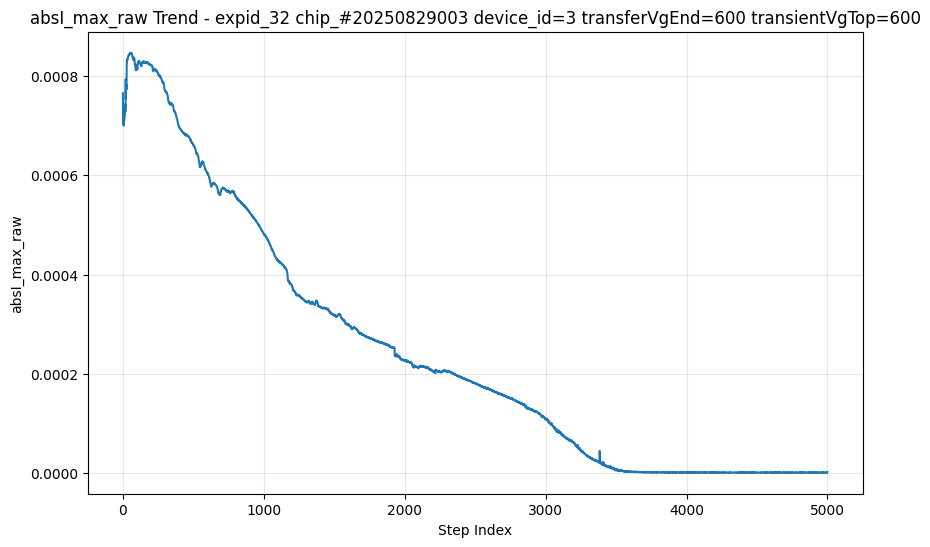

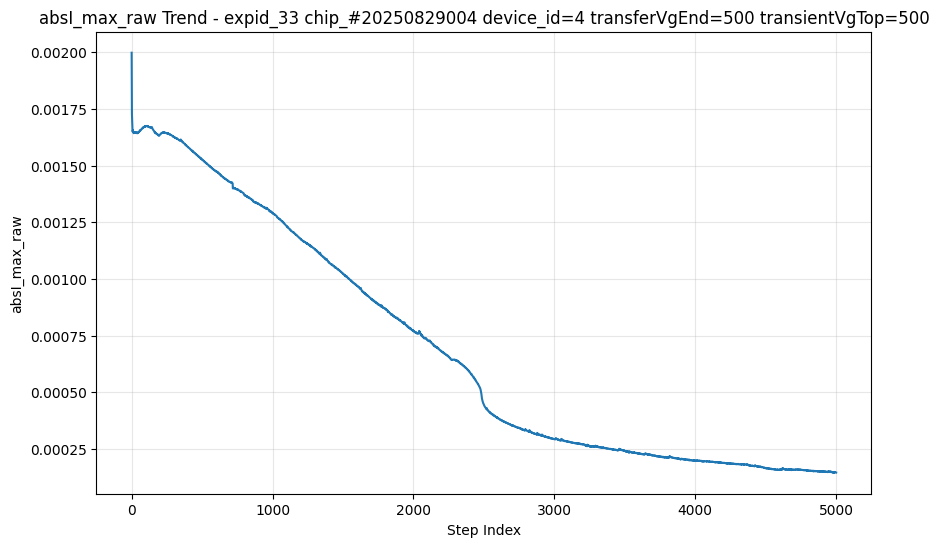

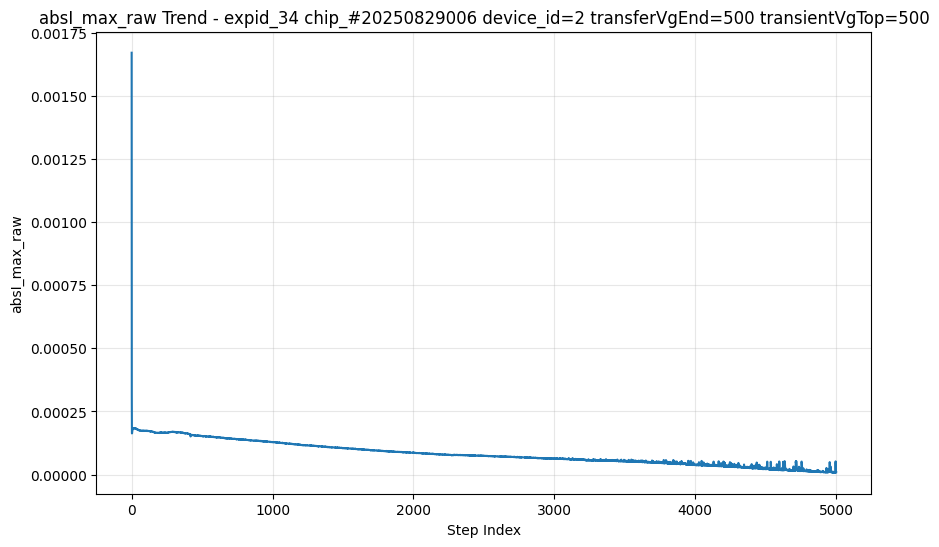

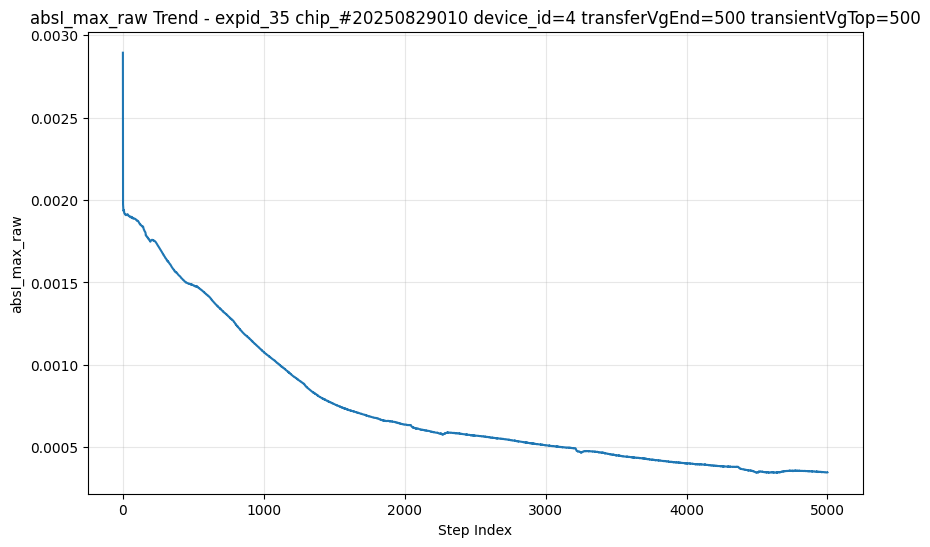

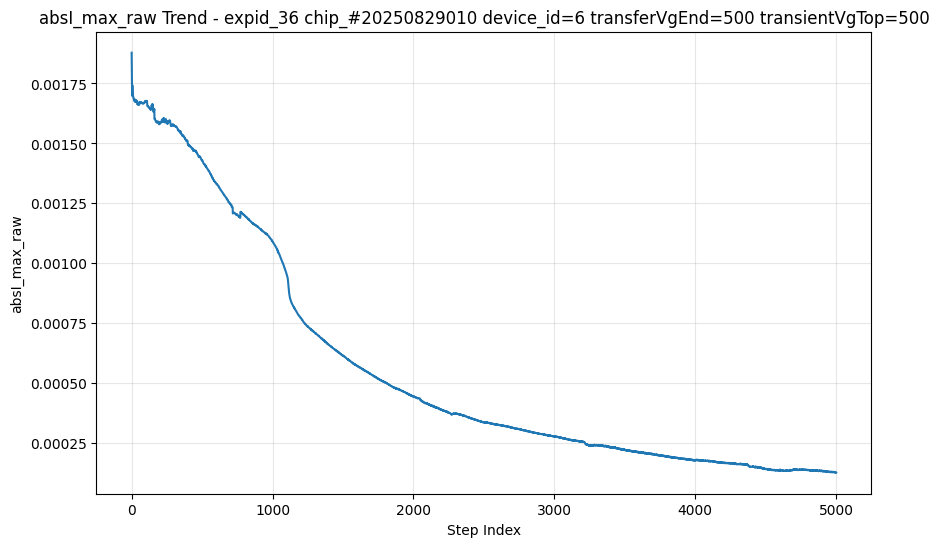

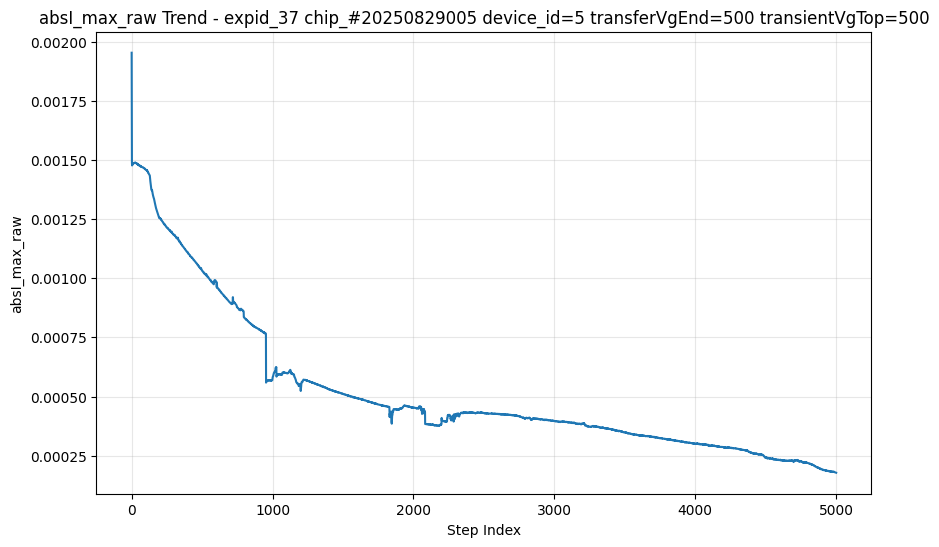

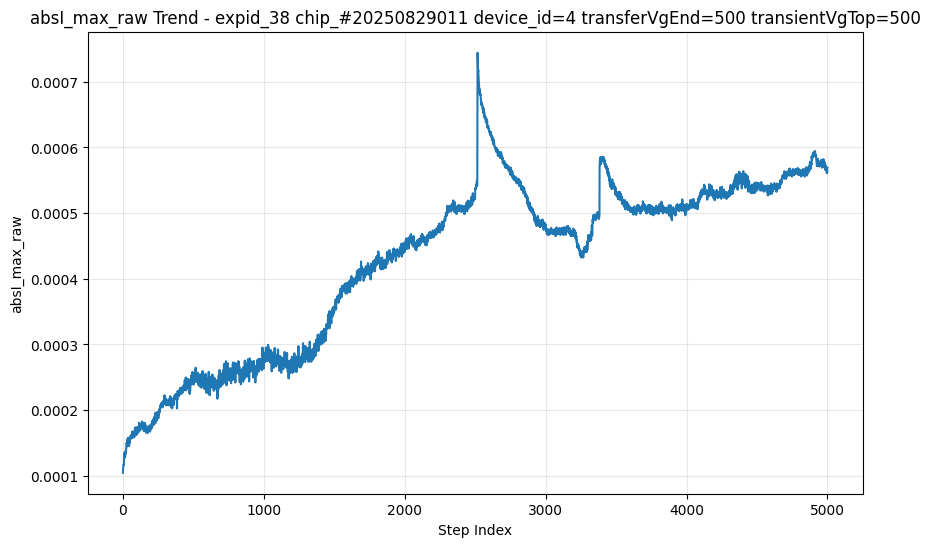

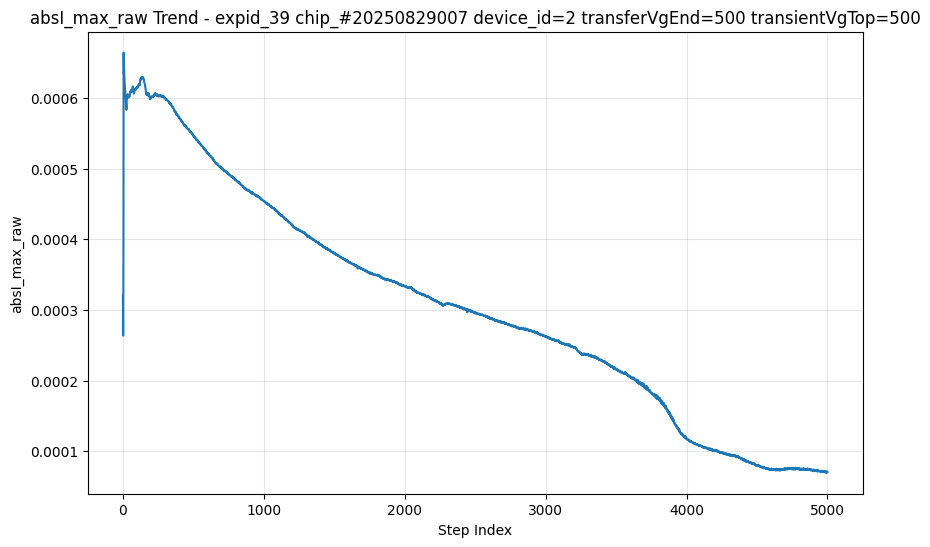

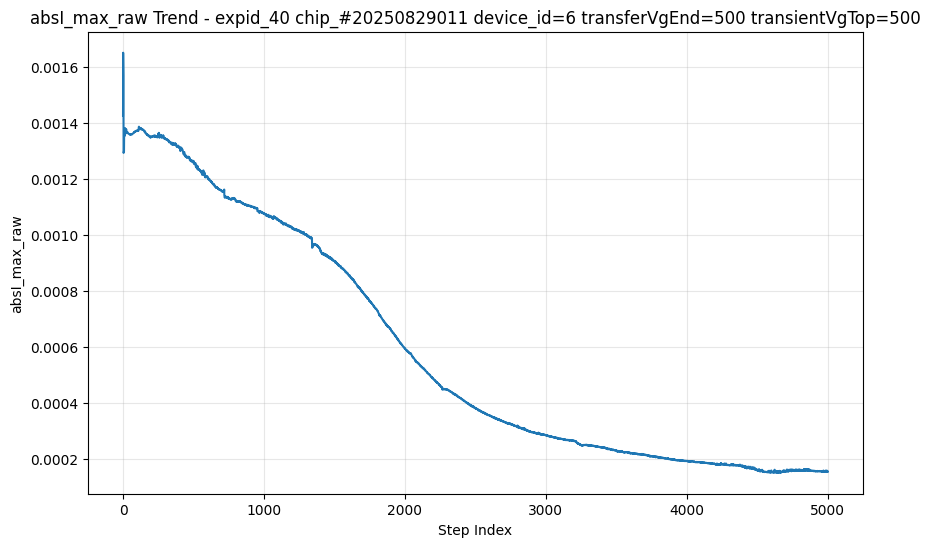

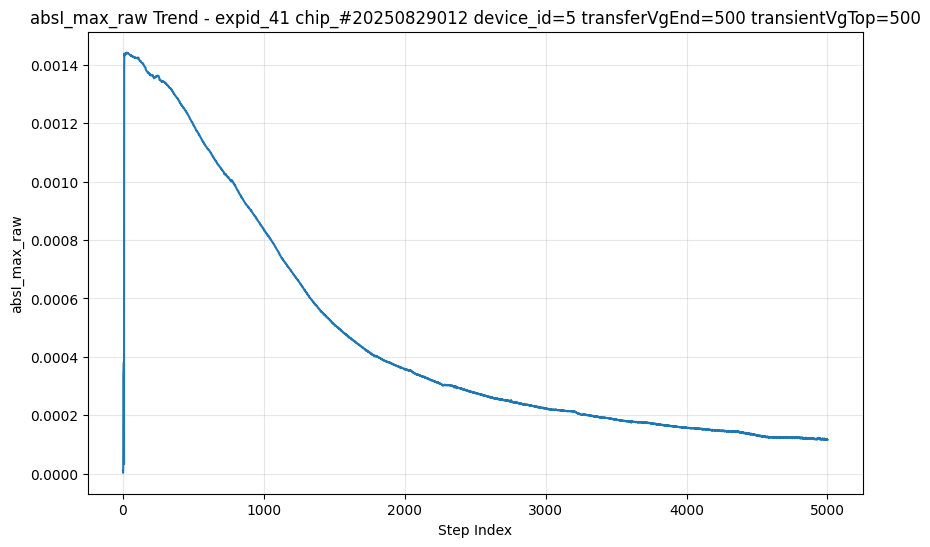

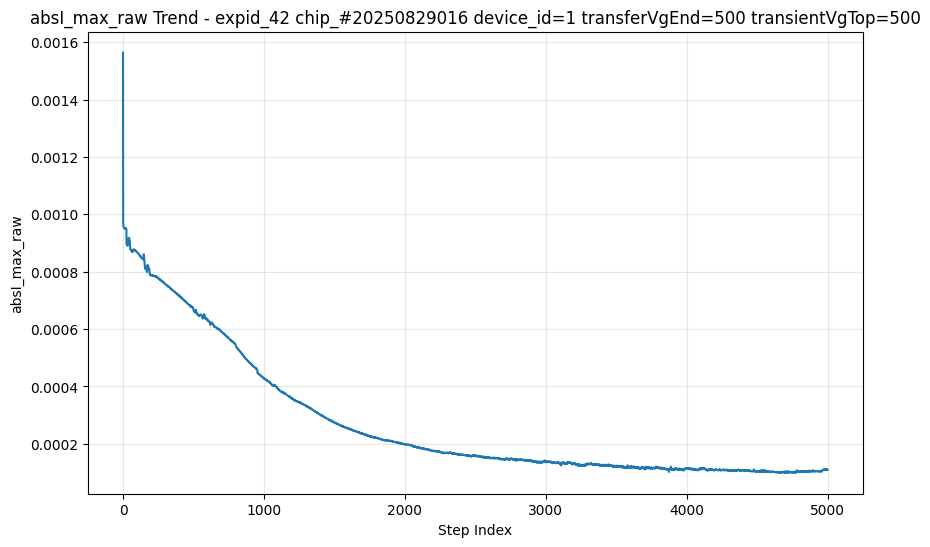

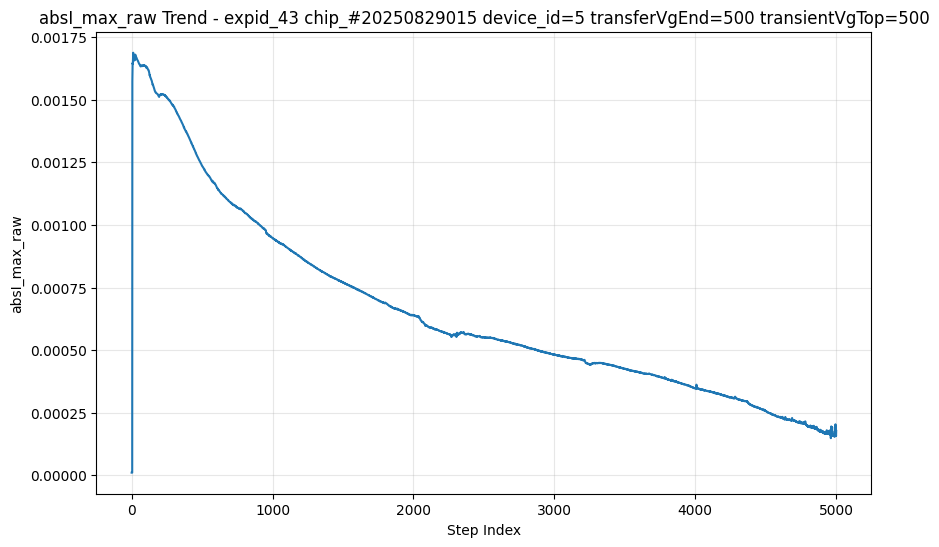

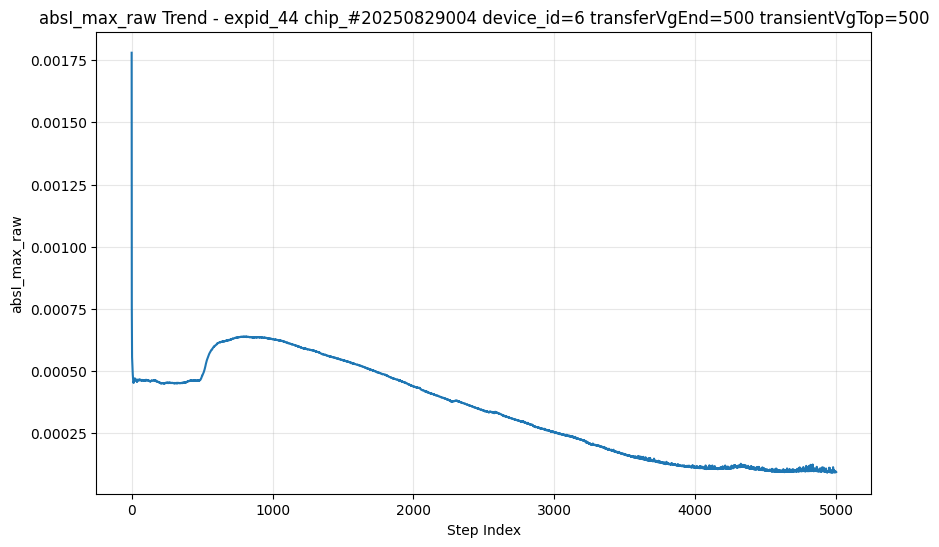

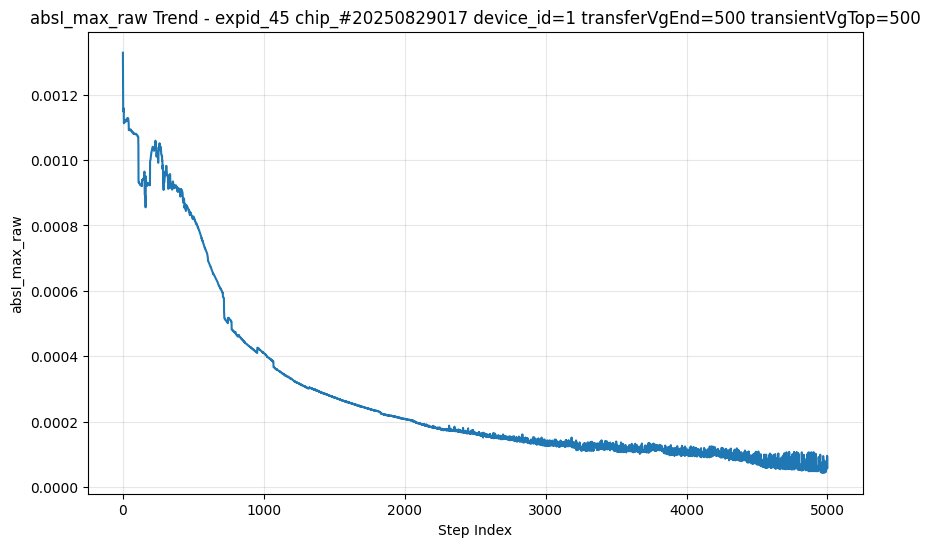

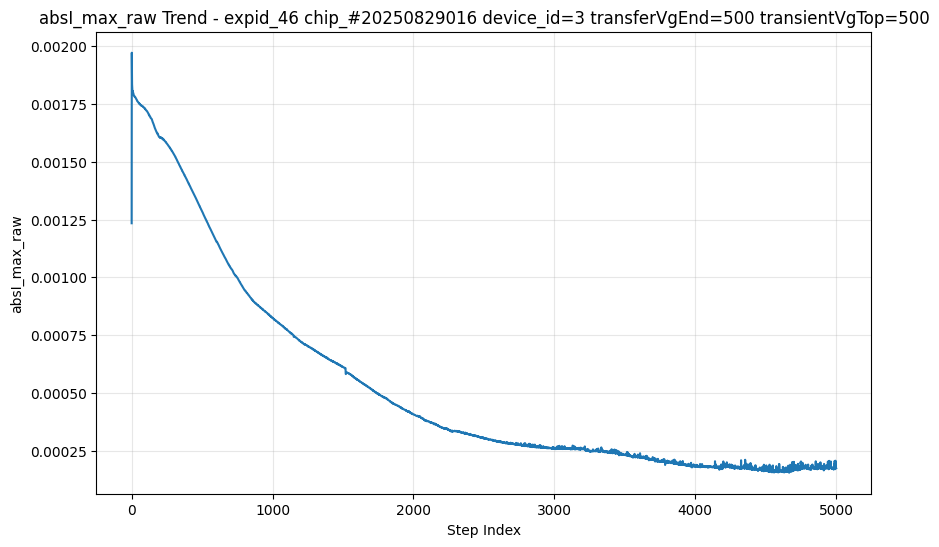

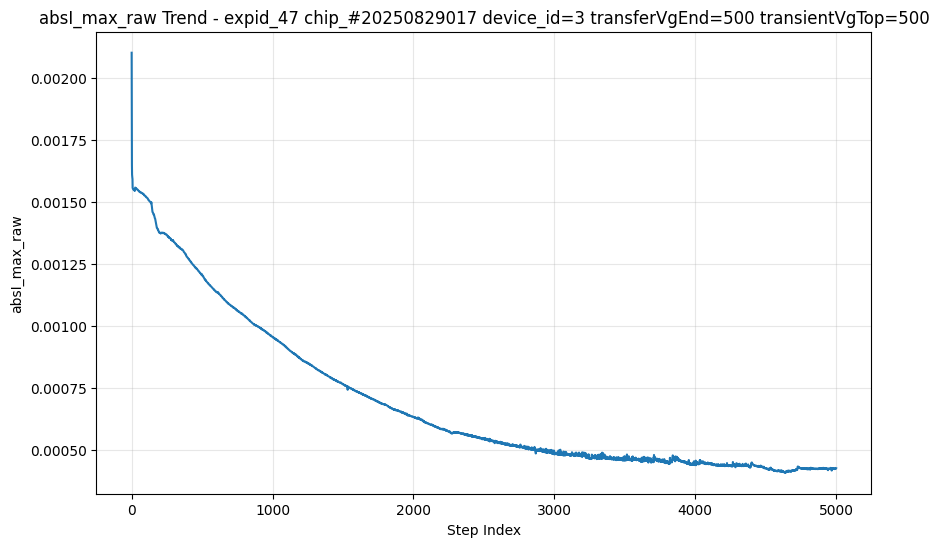

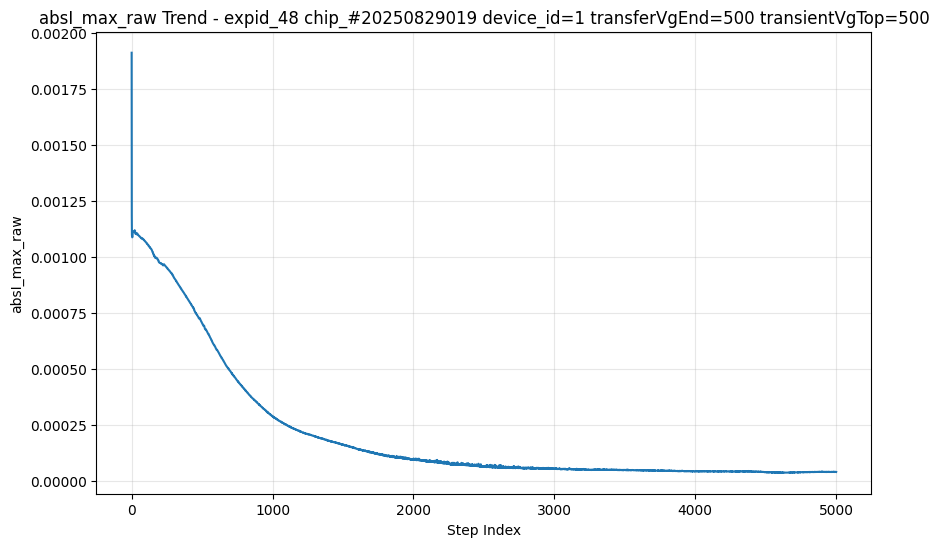

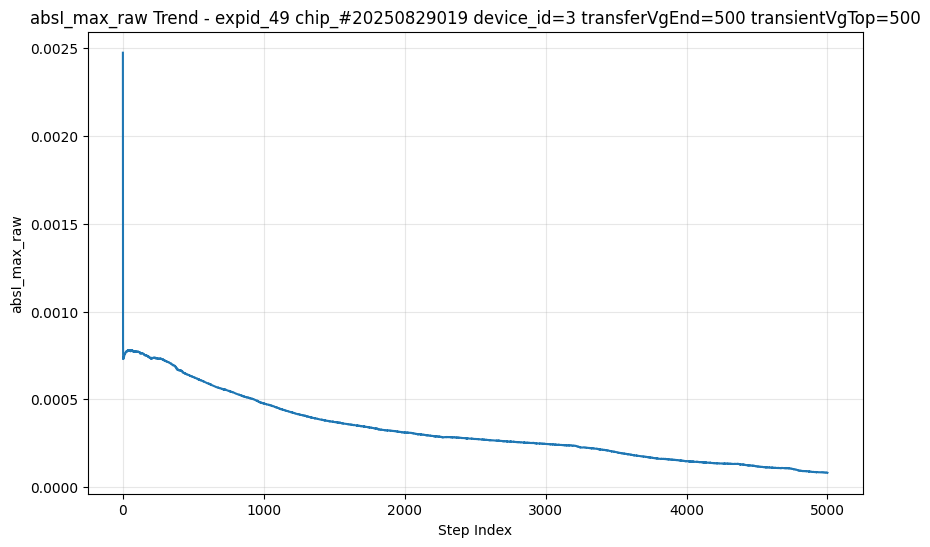

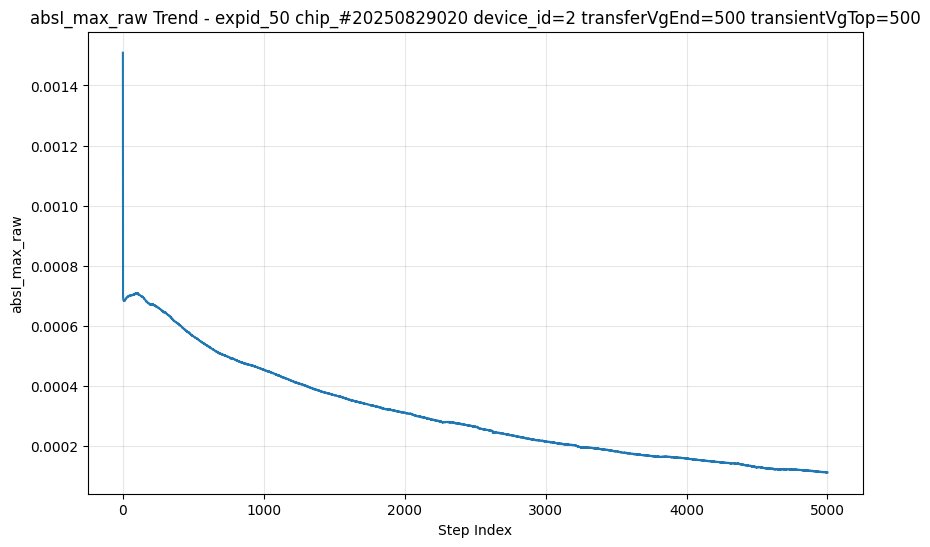

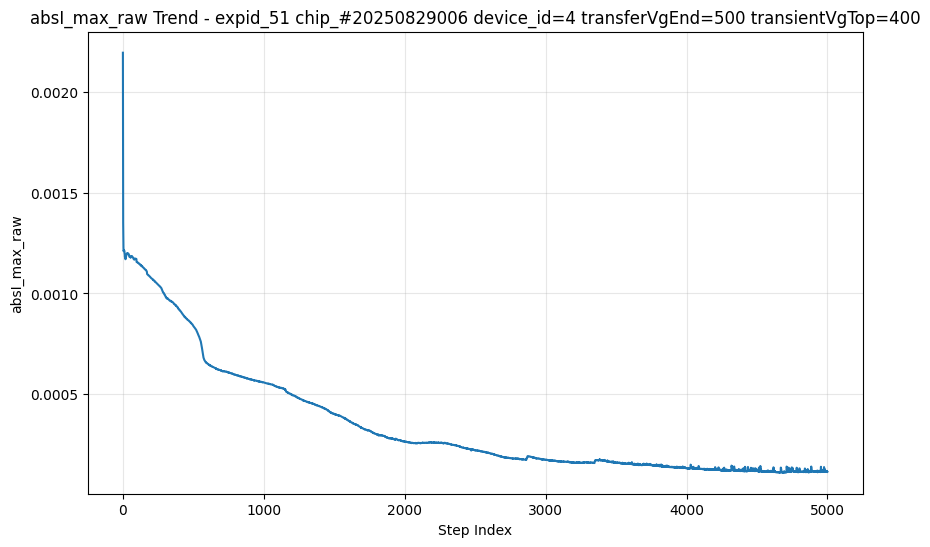

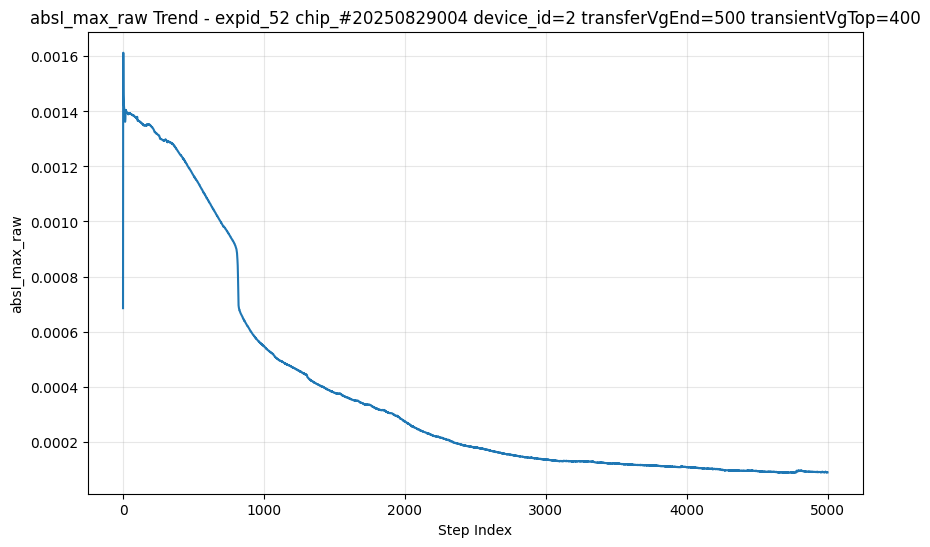

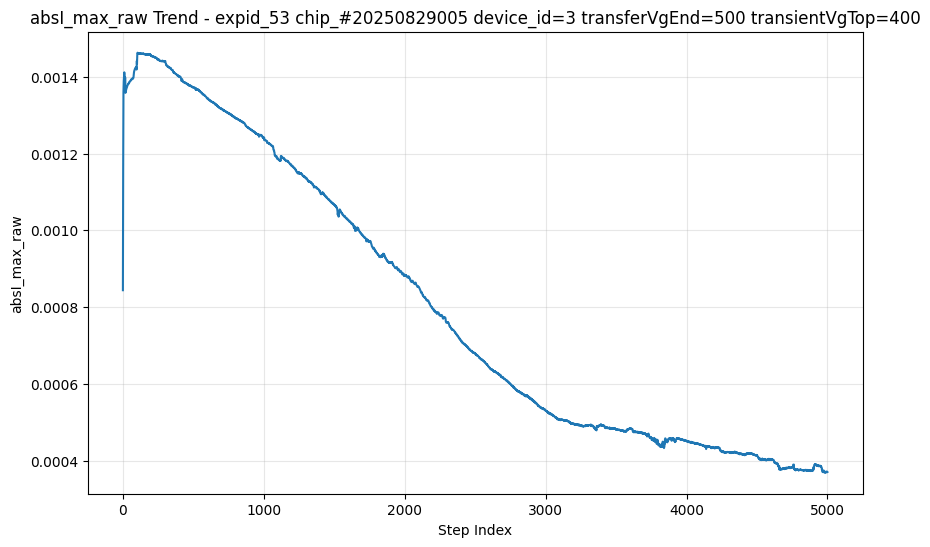

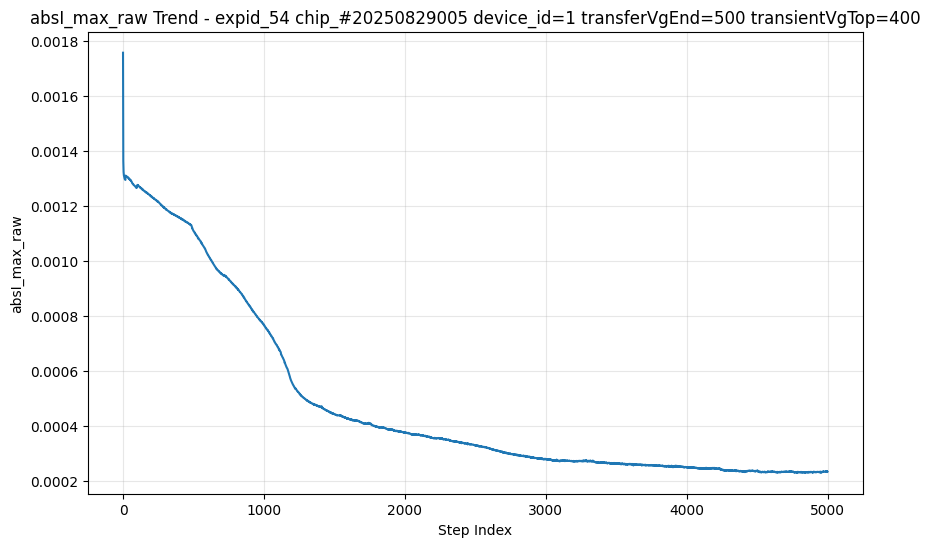

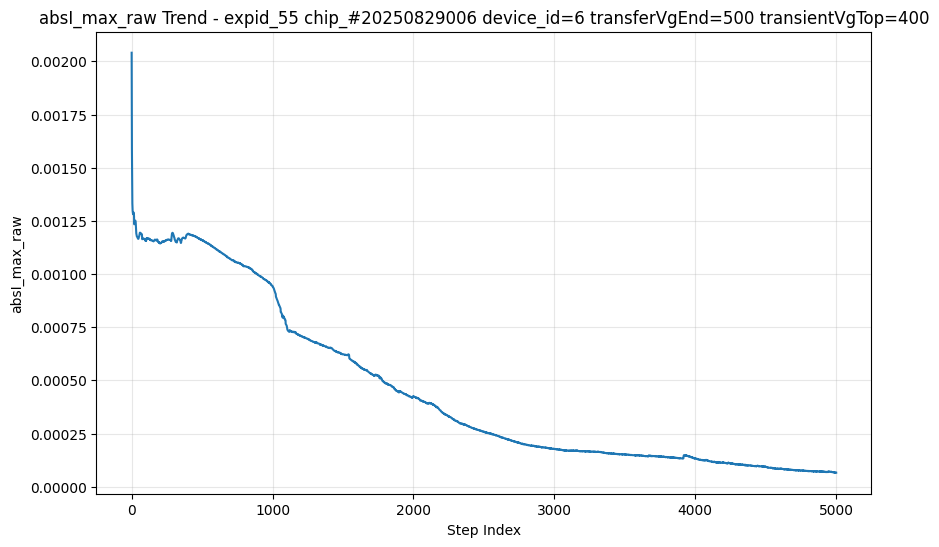

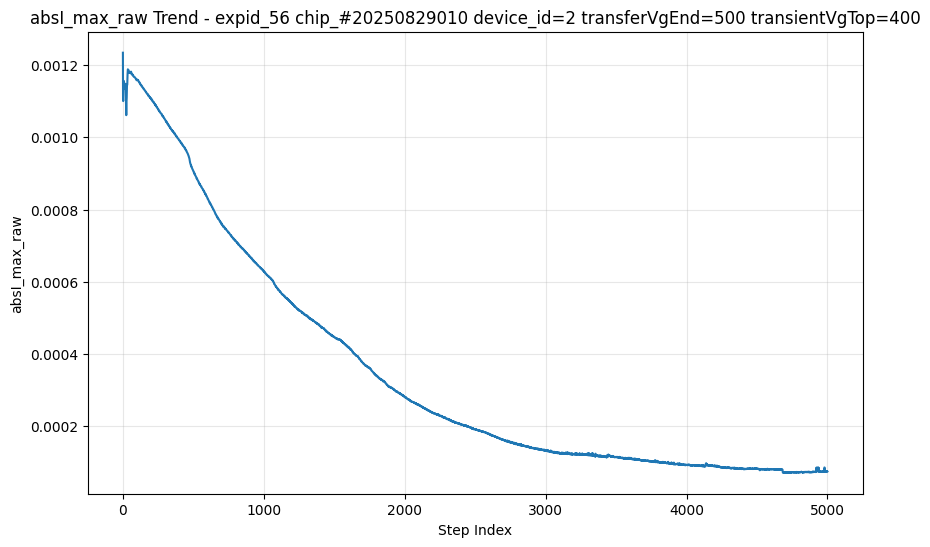

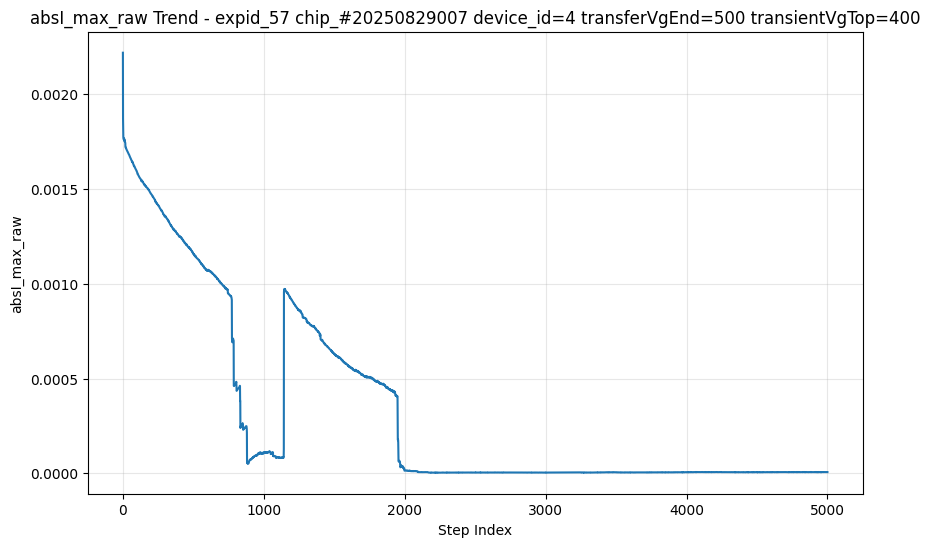

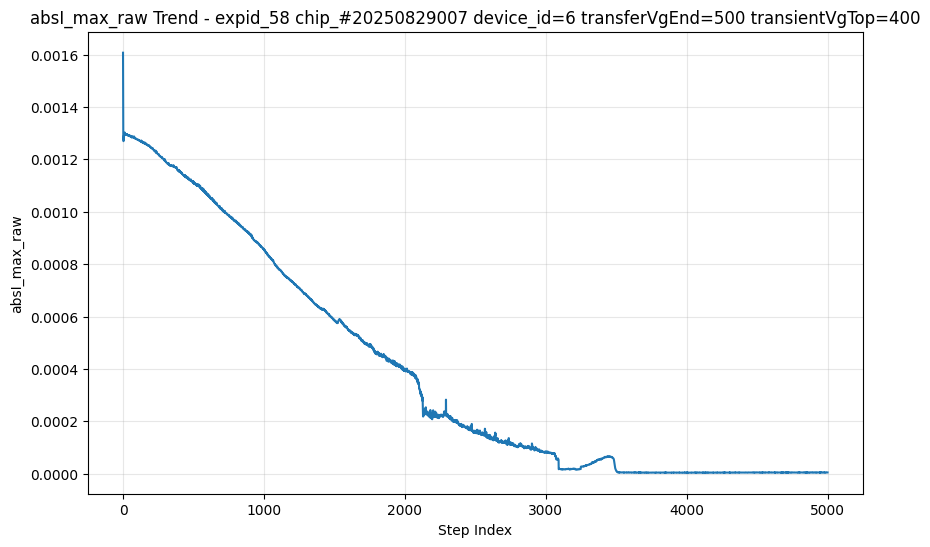

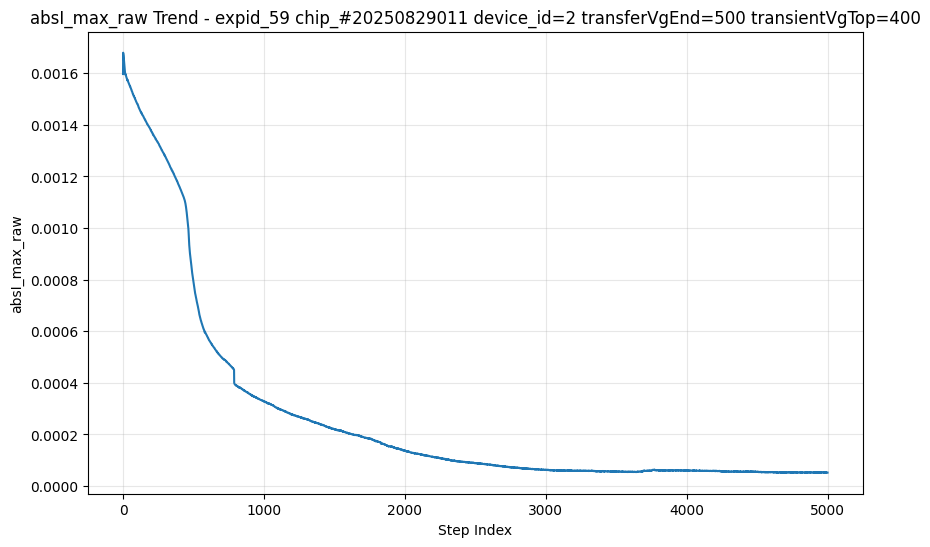

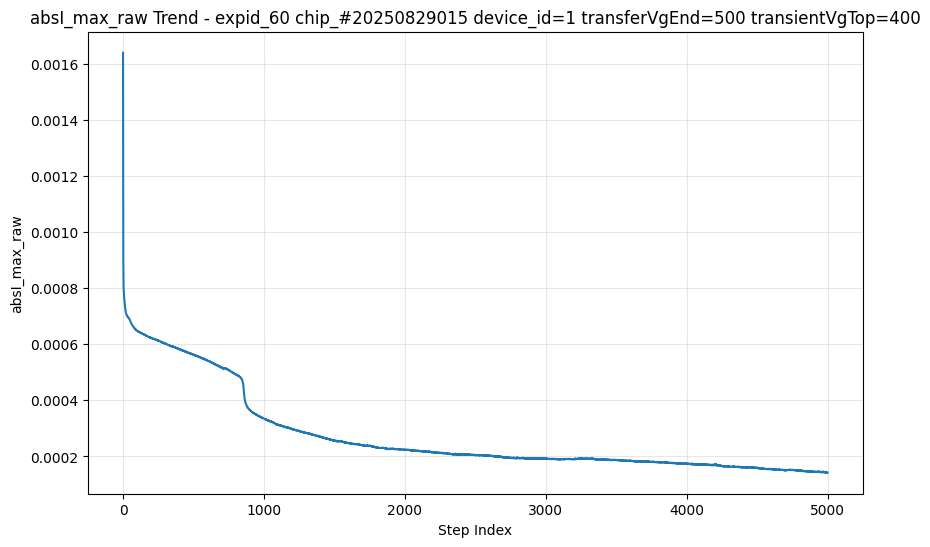

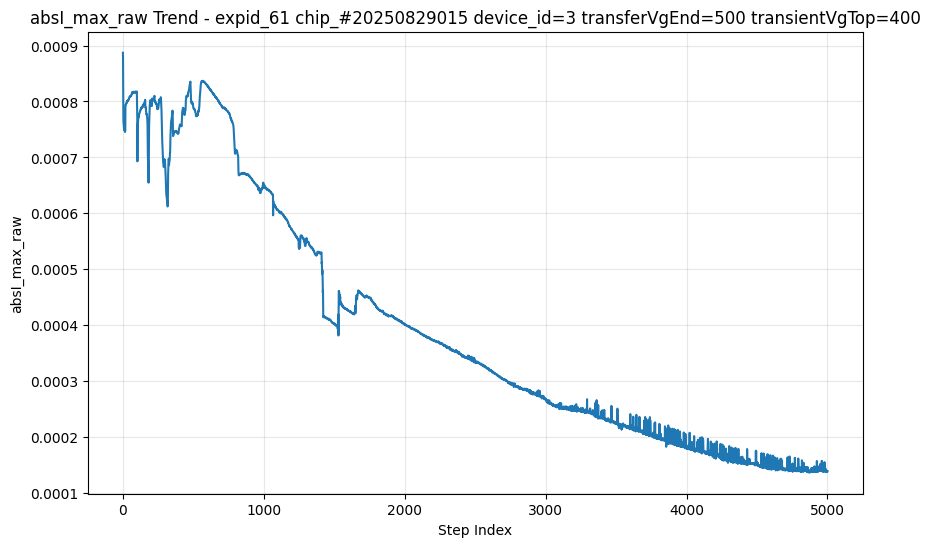

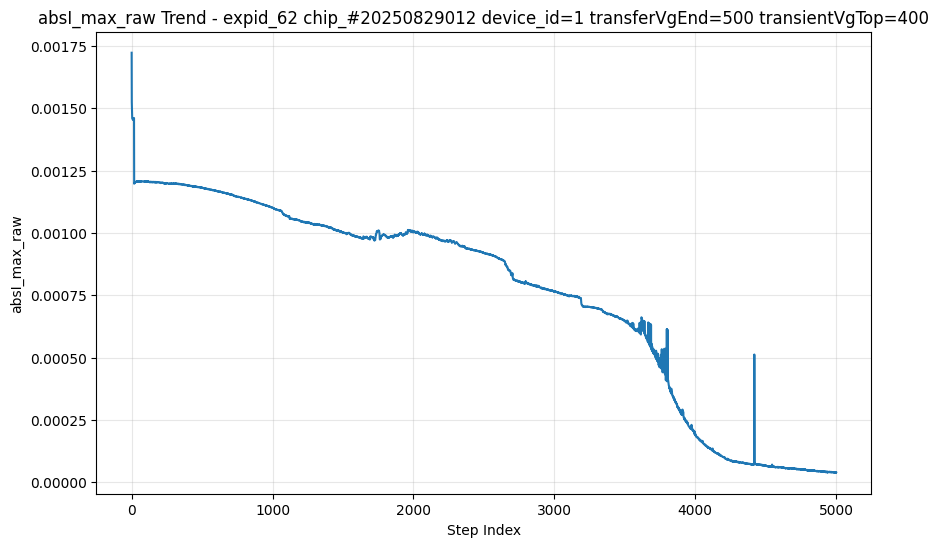

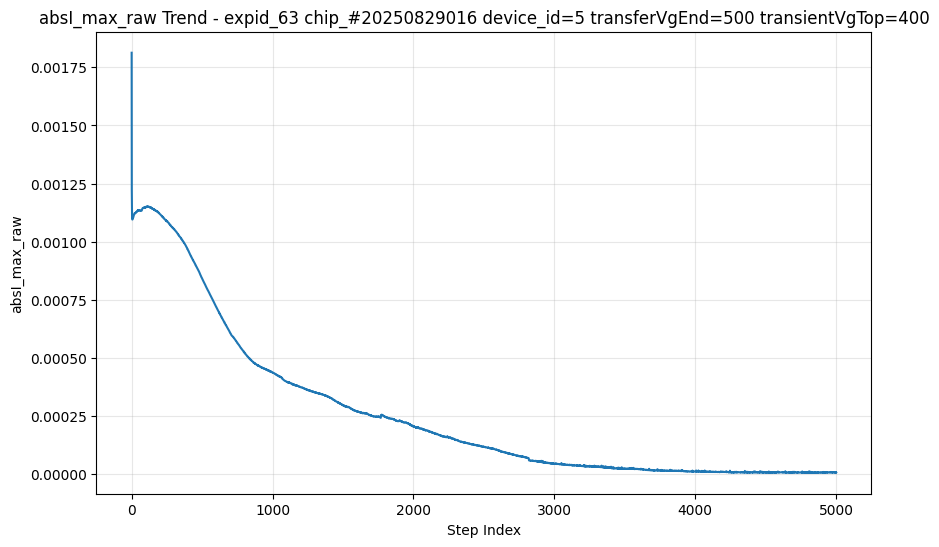

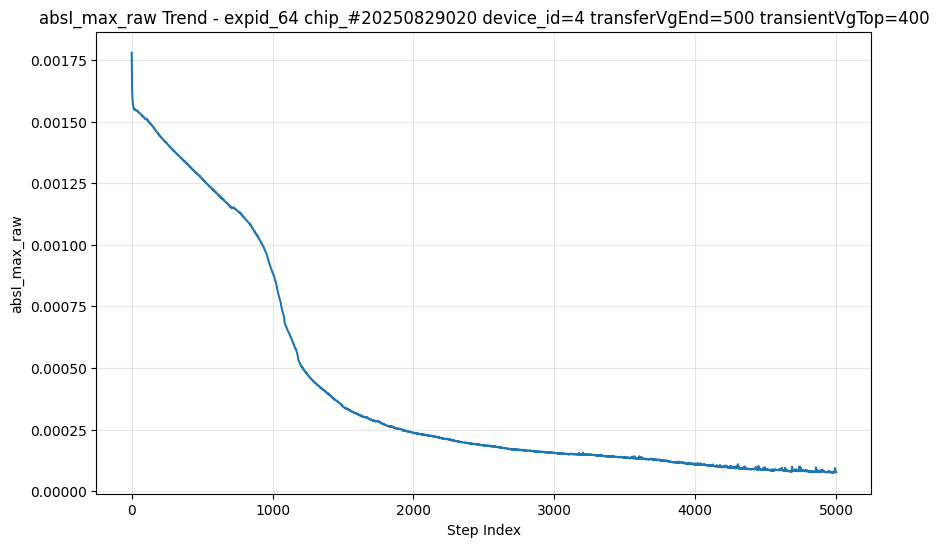

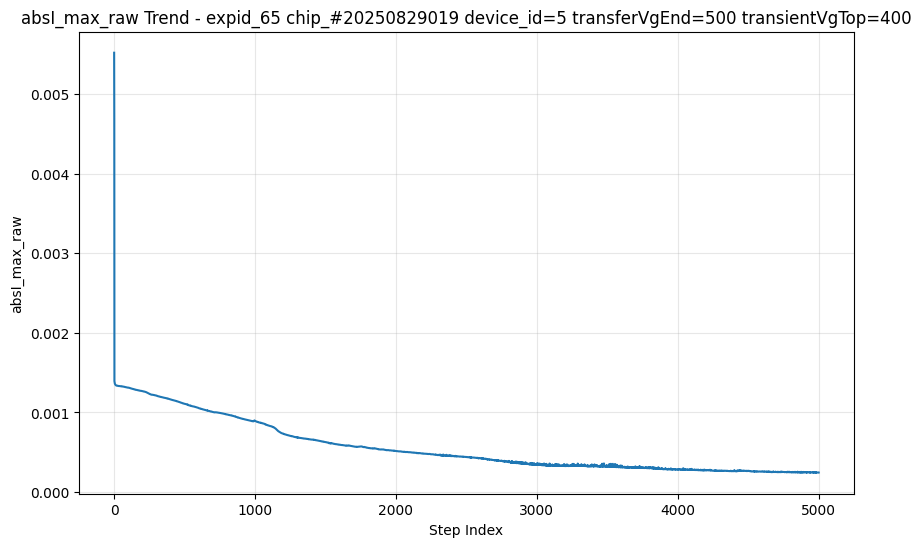

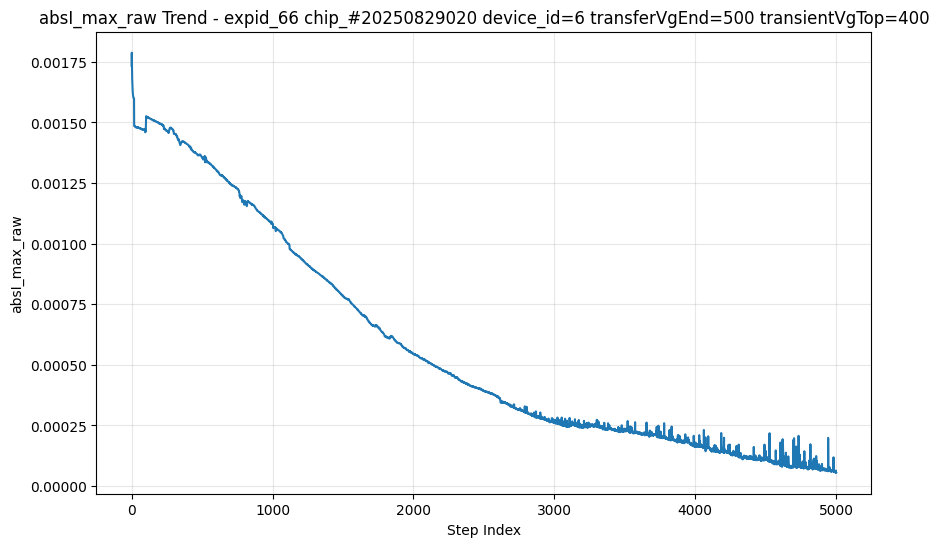

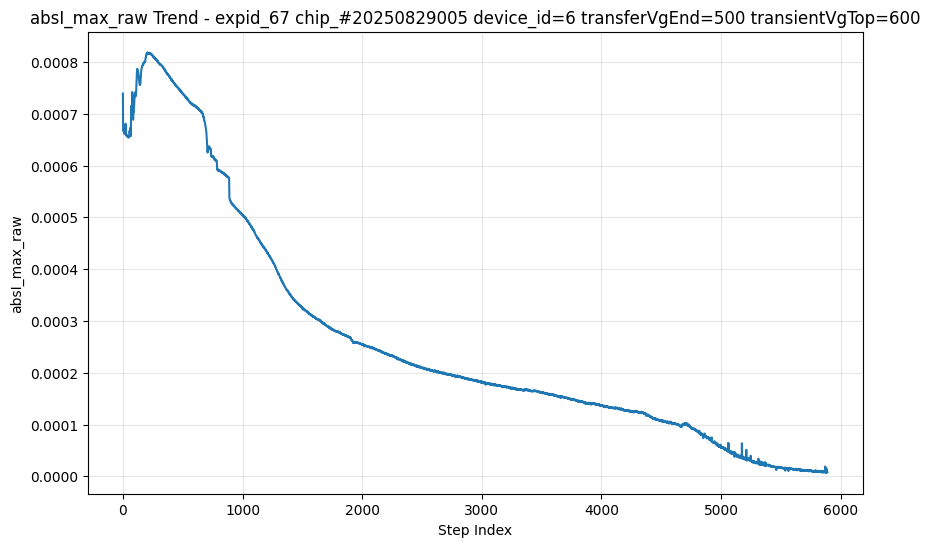

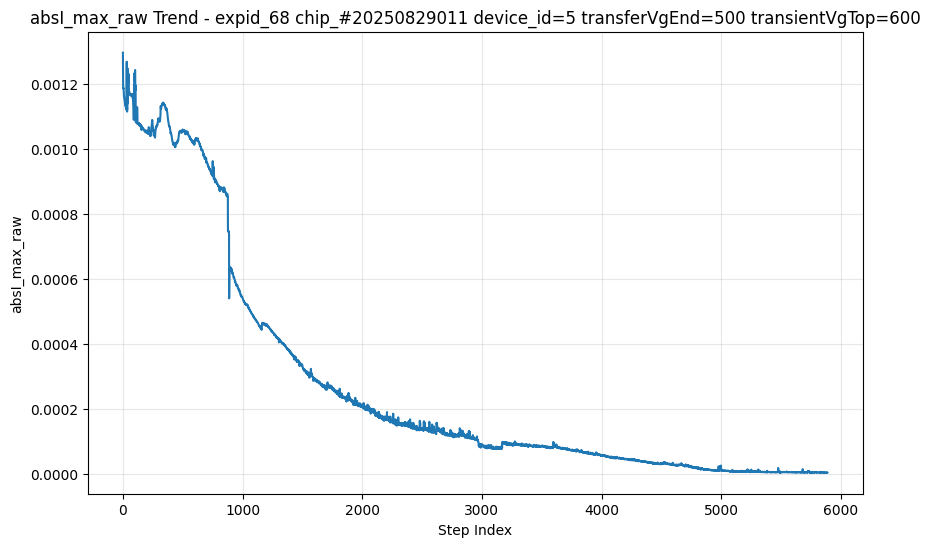

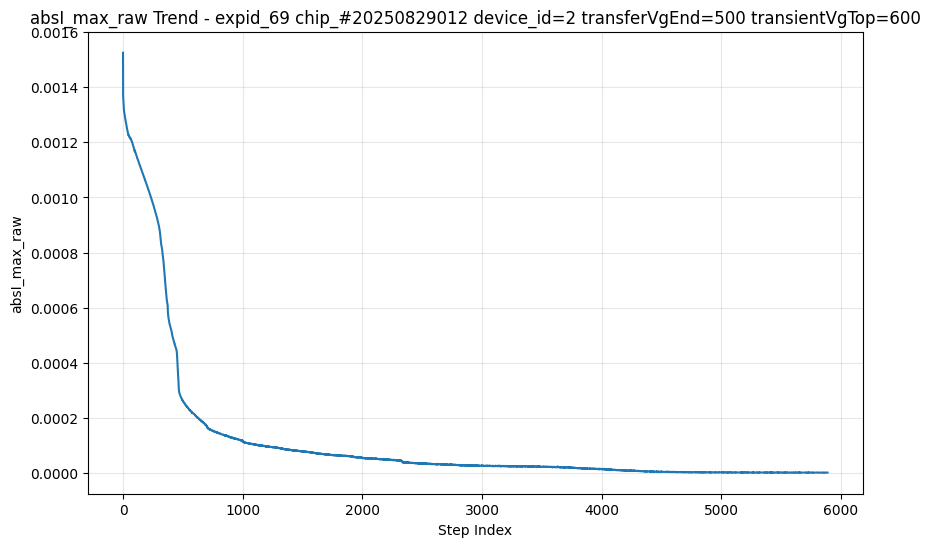

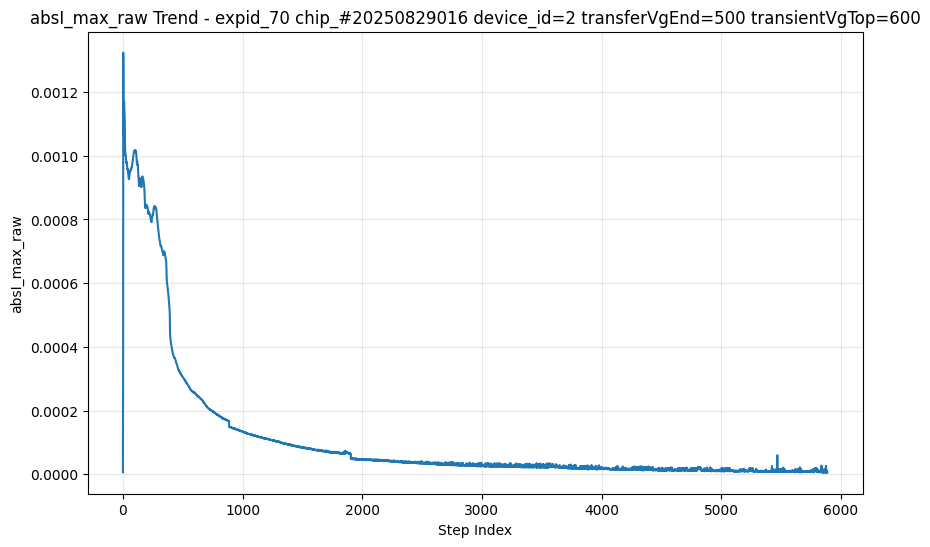

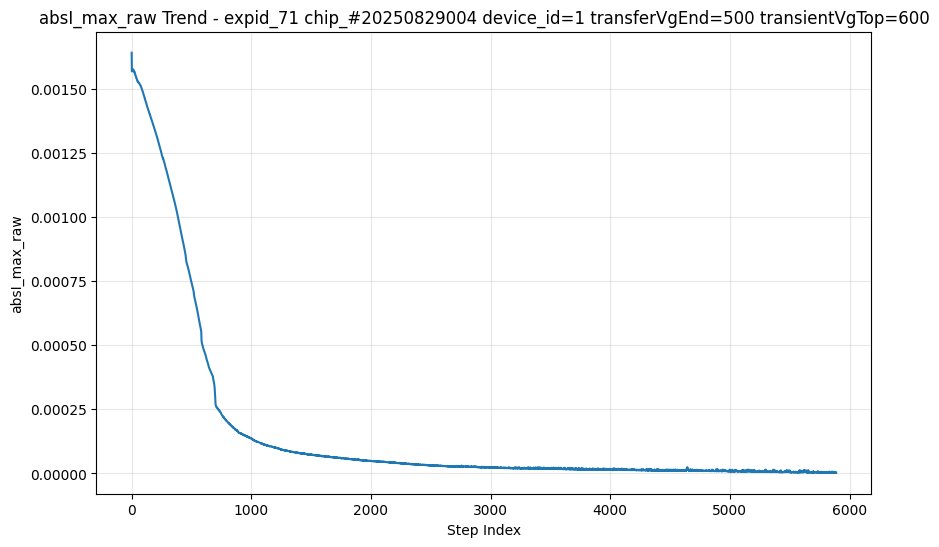

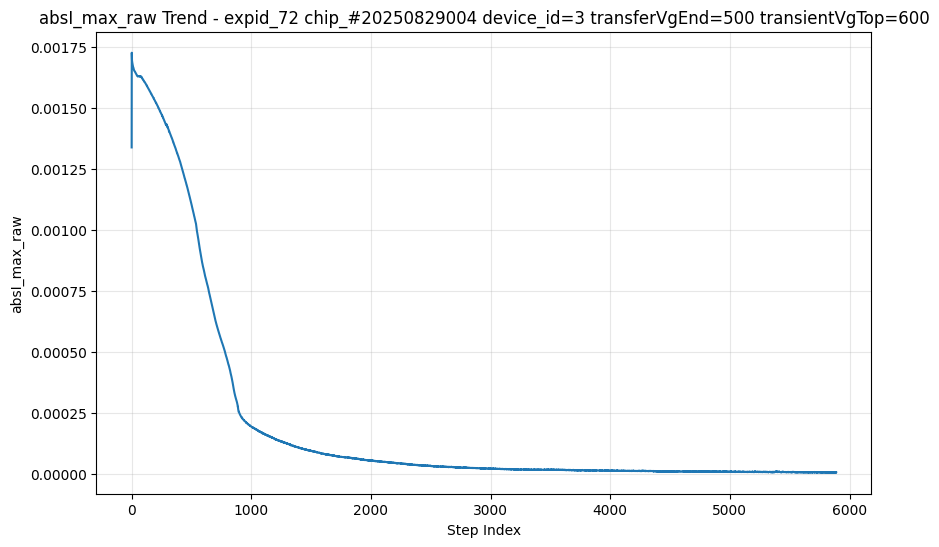

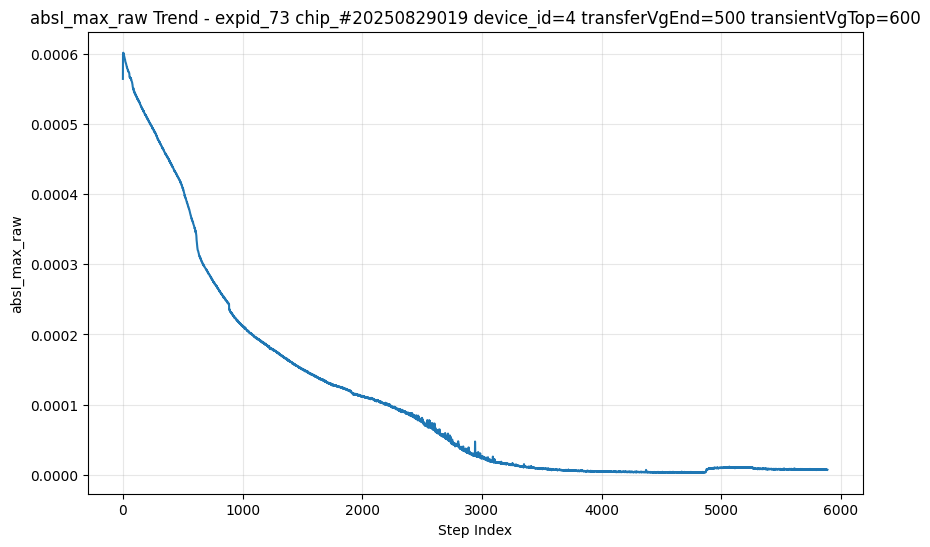

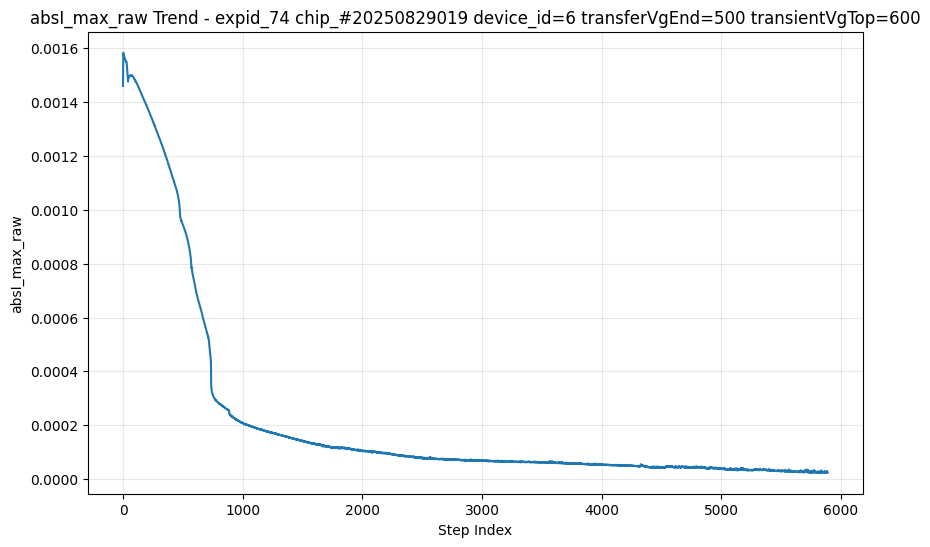

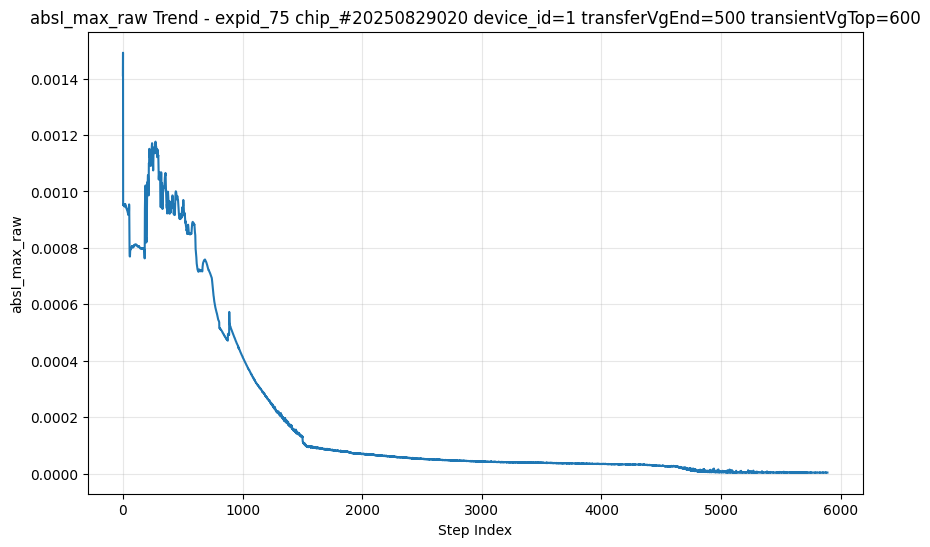

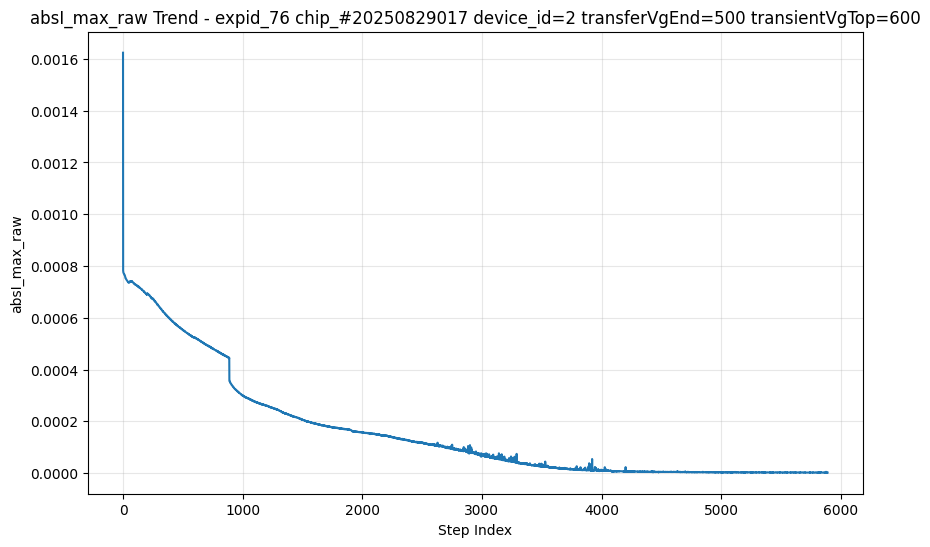

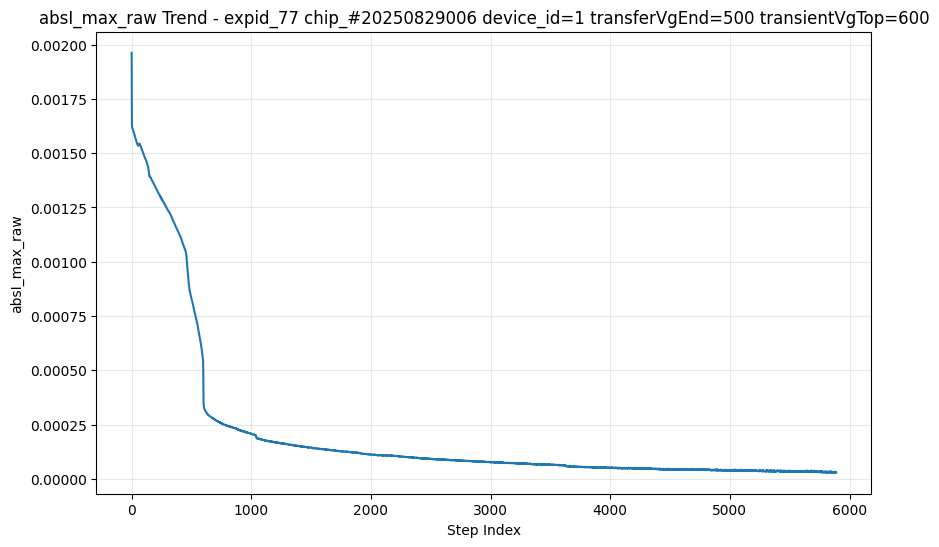

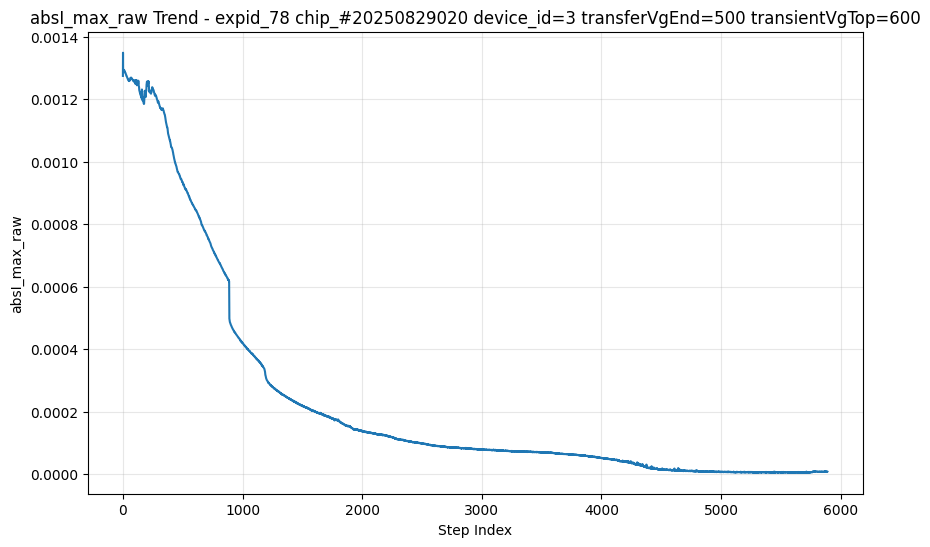

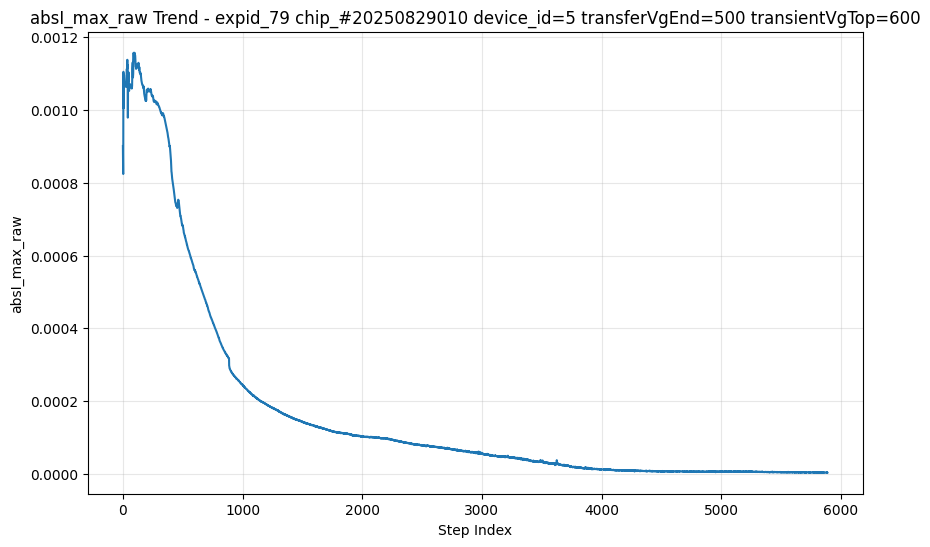

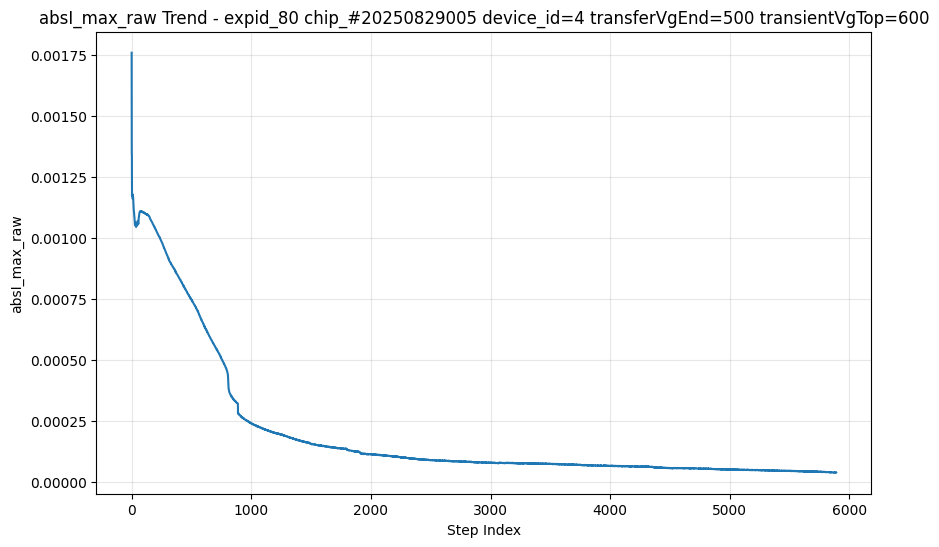

In [15]:
base_dir = '/home/lidonghaowsl/develop_win/hdd/data/Stability_PS20250929'
import os
if not os.path.exists(base_dir):
    os.makedirs(base_dir)
for i in range(len(exps)):
    exp = manager.get_experiment(exp_id=i+1)
    fig = exp.plot_feature_trend('absI_max_raw','transfer',title=f"absI_max_raw Trend - expid_{exp.id} chip_{exp.chip_id} device_id={exp.device_id} transferVgEnd={exp.get_workflow_metadata()['workflow_step_1_1_param_gateVoltageEnd']} transientVgTop={exp.get_workflow_metadata()['workflow_step_1_2_param_gateVoltageTop']}")
    # 保存fig，文件名包含所有的参数信息
    fig.savefig(f"{base_dir}/absI_max_raw_Trend_expid_{exp.id}_chip_{exp.chip_id}_device_id={exp.device_id}_transferVgEnd={exp.get_workflow_metadata()['workflow_step_1_1_param_gateVoltageEnd']}_transientVgTop={exp.get_workflow_metadata()['workflow_step_1_2_param_gateVoltageTop']}.png")
# **kwargs
# 绘图参数，支持：

# title (str): 图表标题，默认为 '{feature_name} Trend - {chip_id}-{device_id}'
# figsize (tuple): 图表尺寸，默认 (10, 6)
# 其他 matplotlib.pyplot.plot 支持的参数 (如 color, linewidth, marker, linestyle 等)

In [ ]:
broken_ids = [6,10,11,12,38]
